## <center> Binary Classiﬁcation <center>

In [1]:
# imports 
import pandas as pd 
from sklearn.model_selection import train_test_split
from functions import removeNonAlphanumeric, toNumeric, target_variable_exploration,plot_categ, plot_numeric, featureEng, getCategFeat
from functions import HandleMissingTransformer,correlationMap,selectFeaturesTransformer
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer
import warnings

pd.options.display.max_colwidth = 200
warnings.filterwarnings(action='ignore')

## 1).  Chronic Kidney Disease: 

In [75]:
# Load data 
data = pd.read_csv(r'./data/kidney_disease.csv')
# Split it to train and test
train_data, test_data = train_test_split(data) 
train_data = train_data.set_index('id')
test_data = test_data.set_index('id')

In [63]:
train_data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
179,72.0,90.0,1.010,2.0,0.0,NaN,abnormal,present,notpresent,124.0,...,39,NaN,NaN,no,no,no,good,no,no,ckd
235,45.0,70.0,1.010,2.0,0.0,NaN,normal,notpresent,notpresent,113.0,...,26,5700,NaN,no,no,yes,good,no,yes,ckd
86,56.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,415.0,...,NaN,NaN,NaN,no,yes,no,good,no,no,ckd
286,71.0,70.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,81.0,...,44,9800,6.0,no,no,no,good,no,no,notckd
85,70.0,70.0,1.015,2.0,NaN,NaN,NaN,notpresent,notpresent,NaN,...,NaN,NaN,NaN,no,yes,no,poor,yes,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,19.0,70.0,1.020,0.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,NaN,6900,NaN,no,no,no,good,no,no,ckd
282,20.0,70.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,123.0,...,44,5500,4.8,no,no,no,good,no,no,notckd
349,35.0,70.0,1.025,0.0,0.0,NaN,NaN,notpresent,notpresent,82.0,...,52,9400,6.1,no,no,no,good,no,no,notckd


In [64]:
# data information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 179 to 262
Data columns (total 25 columns):
age               296 non-null float64
bp                290 non-null float64
sg                267 non-null float64
al                267 non-null float64
su                265 non-null float64
rbc               187 non-null object
pc                254 non-null object
pcc               296 non-null object
ba                296 non-null object
bgr               267 non-null float64
bu                287 non-null float64
sc                287 non-null float64
sod               232 non-null float64
pot               232 non-null float64
hemo              258 non-null float64
pcv               240 non-null object
wc                218 non-null object
rc                200 non-null object
htn               298 non-null object
dm                298 non-null object
cad               298 non-null object
appet             299 non-null object
pe                299 non-null object
ane     

In [66]:
#Get the shape of the data (the number of rows & columns)
print("Shape :",train_data.shape)
# Statistical description of training data set
print(train_data.describe())

Shape : (300, 25)
              age          bp          sg          al          su         bgr  \
count  296.000000  290.000000  267.000000  267.000000  265.000000  267.000000   
mean    51.817568   76.206897    1.017378    0.996255    0.445283  146.404494   
std     17.166794   12.729225    0.005773    1.327834    1.127240   74.762640   
min      2.000000   50.000000    1.005000    0.000000    0.000000   70.000000   
25%     41.750000   70.000000    1.010000    0.000000    0.000000  100.000000   
50%     54.000000   80.000000    1.020000    0.000000    0.000000  121.000000   
75%     65.000000   80.000000    1.020000    2.000000    0.000000  160.000000   
max     83.000000  140.000000    1.025000    4.000000    5.000000  490.000000   

               bu          sc         sod         pot        hemo  
count  287.000000  287.000000  232.000000  232.000000  258.000000  
mean    59.214983    2.952962  137.560345    4.748276   12.493411  
std     52.239199    4.579841    6.921062    3.6

In [89]:
# Describe columns not taken into consideration in cell above, we will deal with categorical data after cleaning the data
train_data[[c for c in train_data.columns if c not in train_data.describe().columns]].astype('category').describe()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
count,300,300,300,300,300,300,300,300,300,300,300
unique,2,2,2,2,2,2,2,2,2,2,2
top,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
freq,263,242,266,284,186,196,273,236,242,252,187


### Data Cleaning

In [31]:
train_data['cad'].unique()

array(['no', 'yes', '\tno', nan], dtype=object)

There is noise in data. As we can see, 'no' and '\tno' are considered as two modalities. 

In [82]:
# Remove non alphanumeric 
transf_alphaN = FunctionTransformer(removeNonAlphanumeric, validate= False) 
# Transform function to Transformer object so that we can use in pipeline at test time
transf_num = FunctionTransformer(toNumeric, validate= False)
train_data = transf_alphaN.transform(train_data)
train_data = transf_num.transform(train_data)


In [33]:
train_data['cad'].unique()

array(['no', 'yes', nan], dtype=object)

In [84]:
# Get columns with null values
print("Columns with null values before imputing")
print(train_data.columns[train_data.isna().any()].tolist())

# Handle missing values
transf_Missing = HandleMissingTransformer(method="most_frequent")
train_data = transf_Missing.fit(train_data).transform(train_data)

print("Columns with null values after imputing")
print(train_data.columns[train_data.isna().any()].tolist())

Columns with null values before imputing
['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
Columns with null values after imputing
[]


In [83]:
minModalities = 7 ## To match dataset desciprtion on UCI website, numerical variables with less than 7 modalities are considered as nominal
categorical_features = getCategFeat(train_data,minModalities,'classification')
print("Categorical Features : ",categorical_features)
numerical_features = [c for c in train_data.columns if c not in categorical_features and c!="classification"]
print("Numerical Features : ", numerical_features)

Categorical Features :  ['sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
Numerical Features :  ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']


### Data visualization

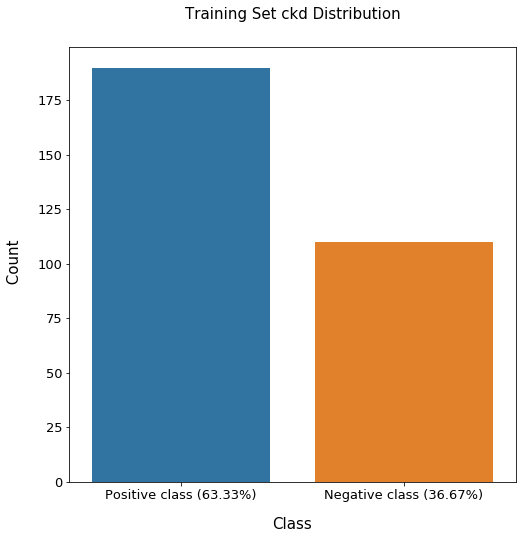

In [14]:
### Target variable exploration

target_variable_exploration(train_data, "classification", 'Class', ' Count', 'Training Set ckd Distribution', positive = 'ckd')

The classes are slithly umbalanced.

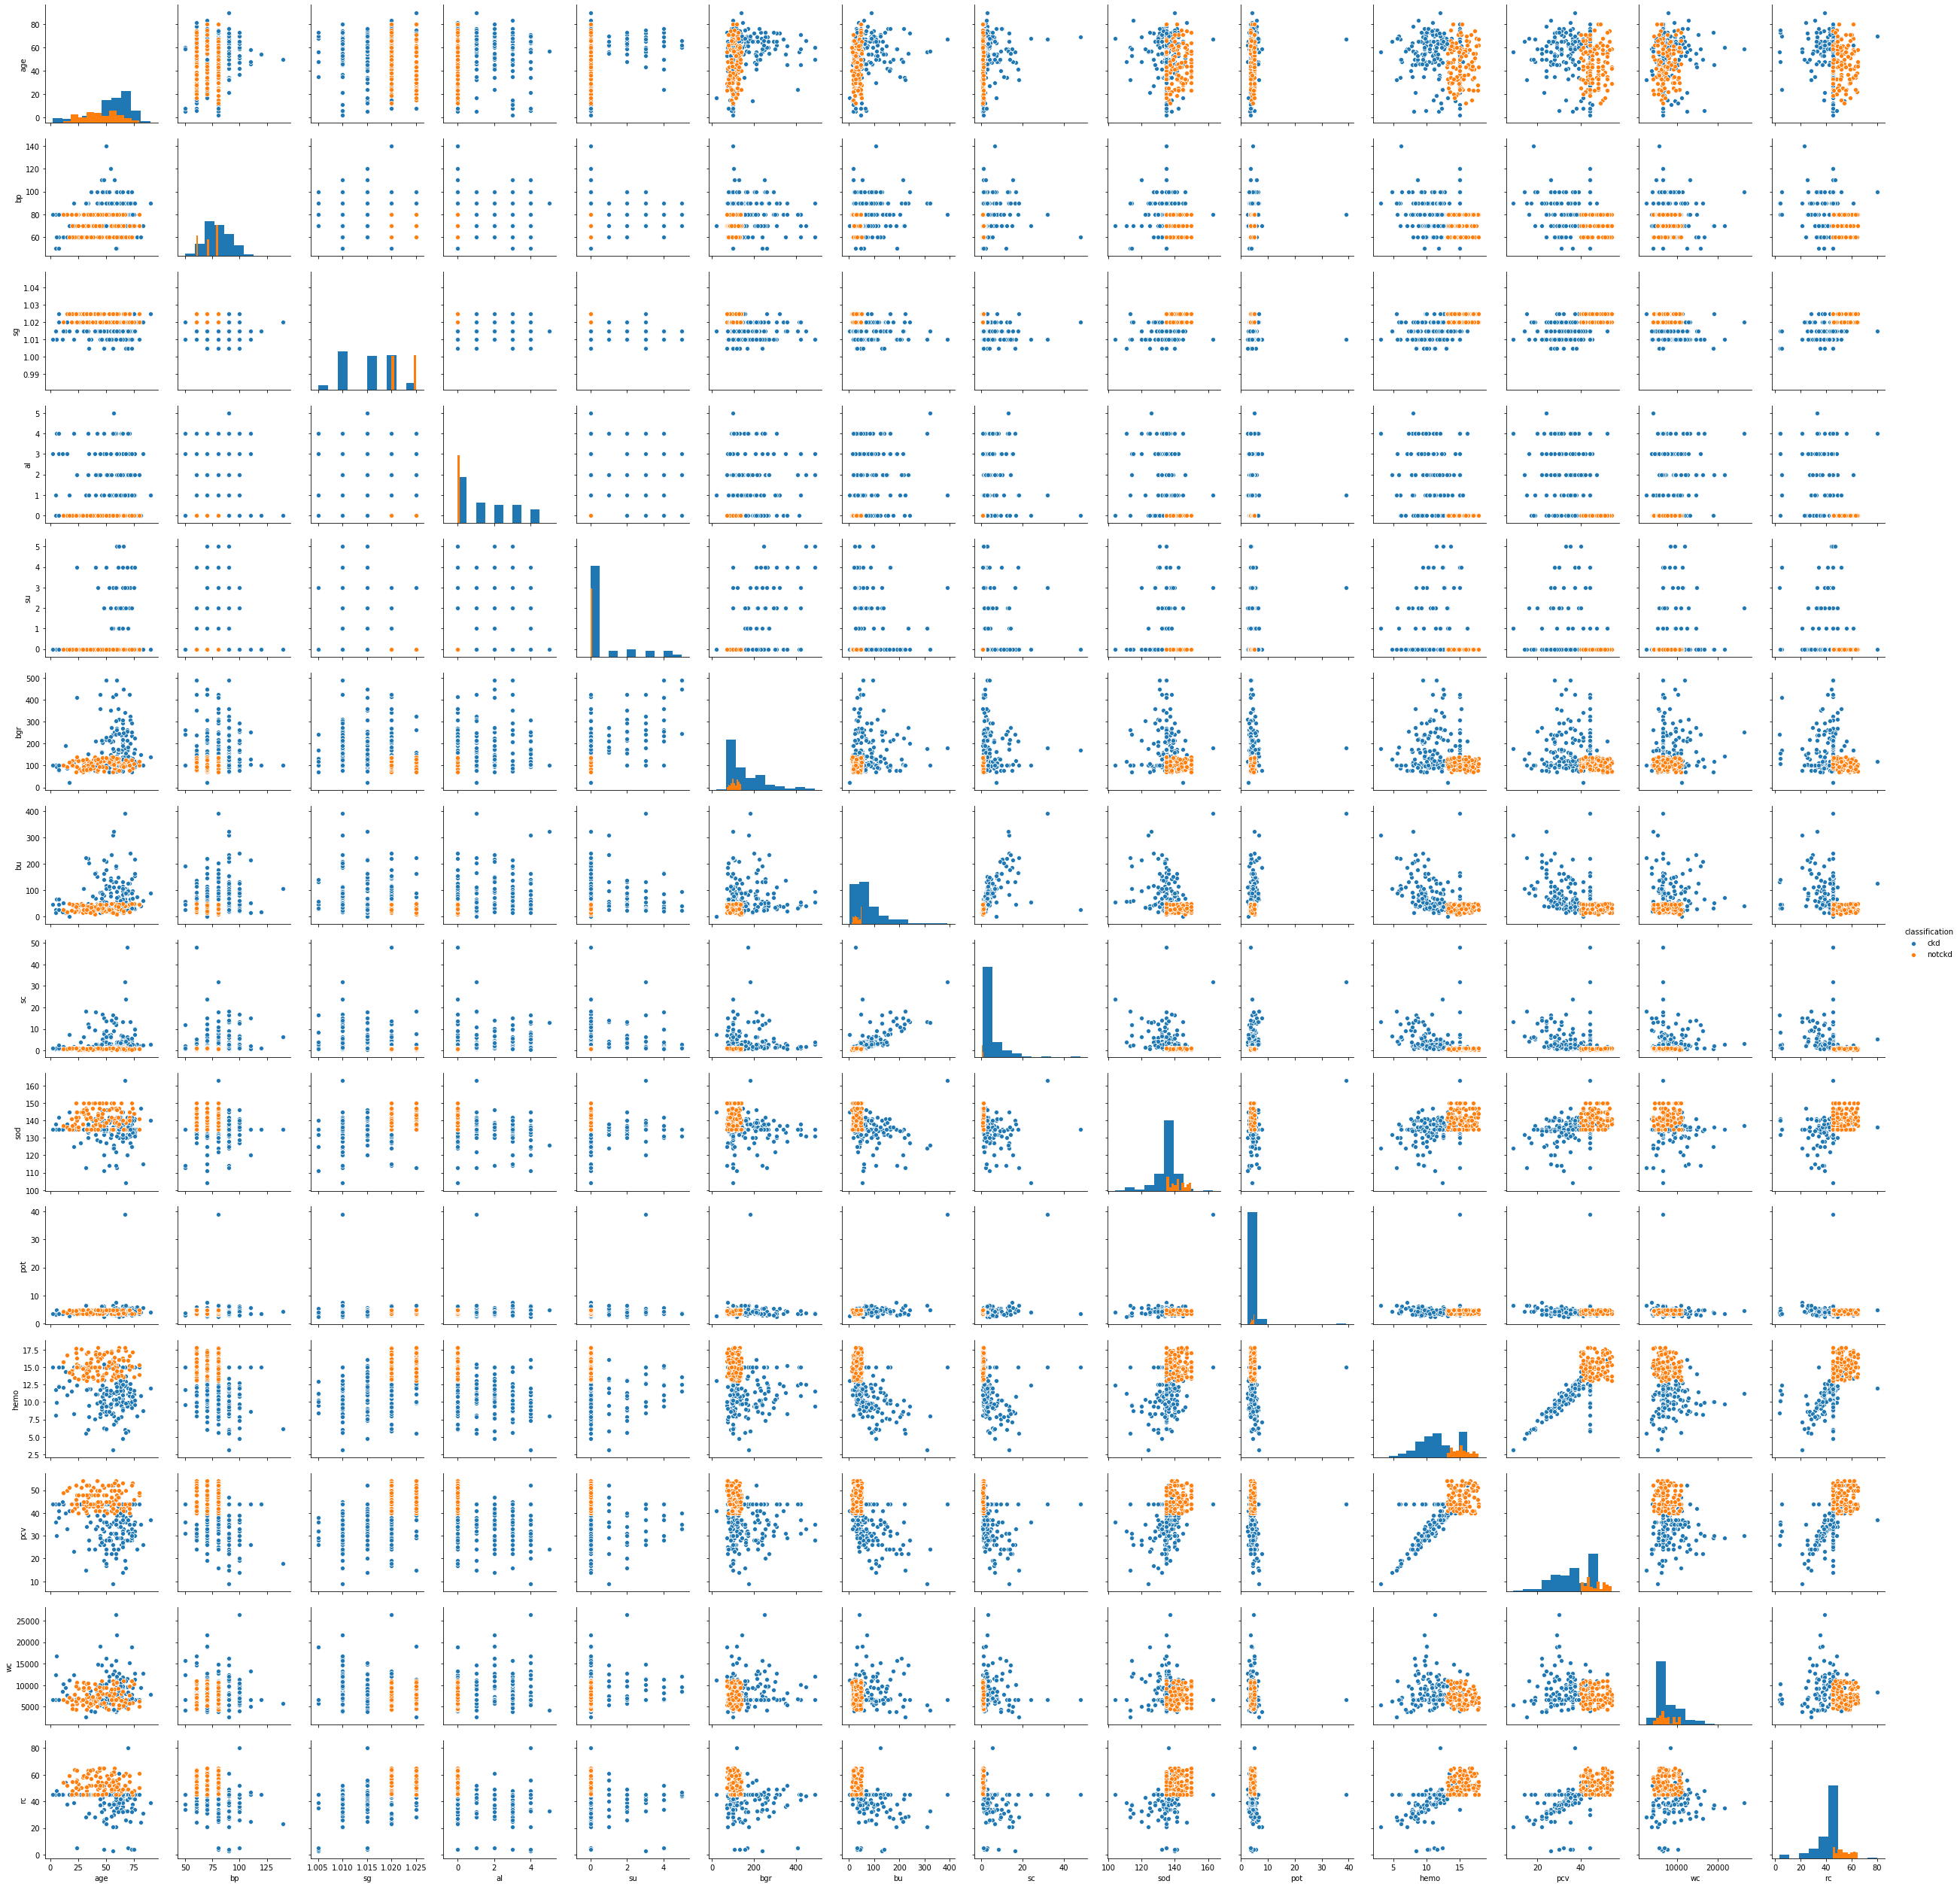

In [17]:
# Pairplots
sns.pairplot(train_data, diag_kind ='hist' , hue="classification")
plt.show()

### Analyse :
    - For variables "RC", "pvc", "hemo", "sod", bigger values corresponds to higher probability of "nonckd" ;
    - The histograms of the numerical features show that there are numerical variables present in the dataset that consists of few discrete values, e.g. "sg". Those features are considered as nominal (As stated in data description on the website UCI); 
    - Some modalities of categorical features (eg. "ba") exist only among individuals with ckd ;
    - There are some categorical features, where the different categories occur with similar frequency, e.g. for "sg"; and there are feature, where one category is very dominant, e.g. for "su" ;
    - Some features show a linear relationship with each other, for example "hema" and "pcv". We will study later correlation relationships between variables.
    
    

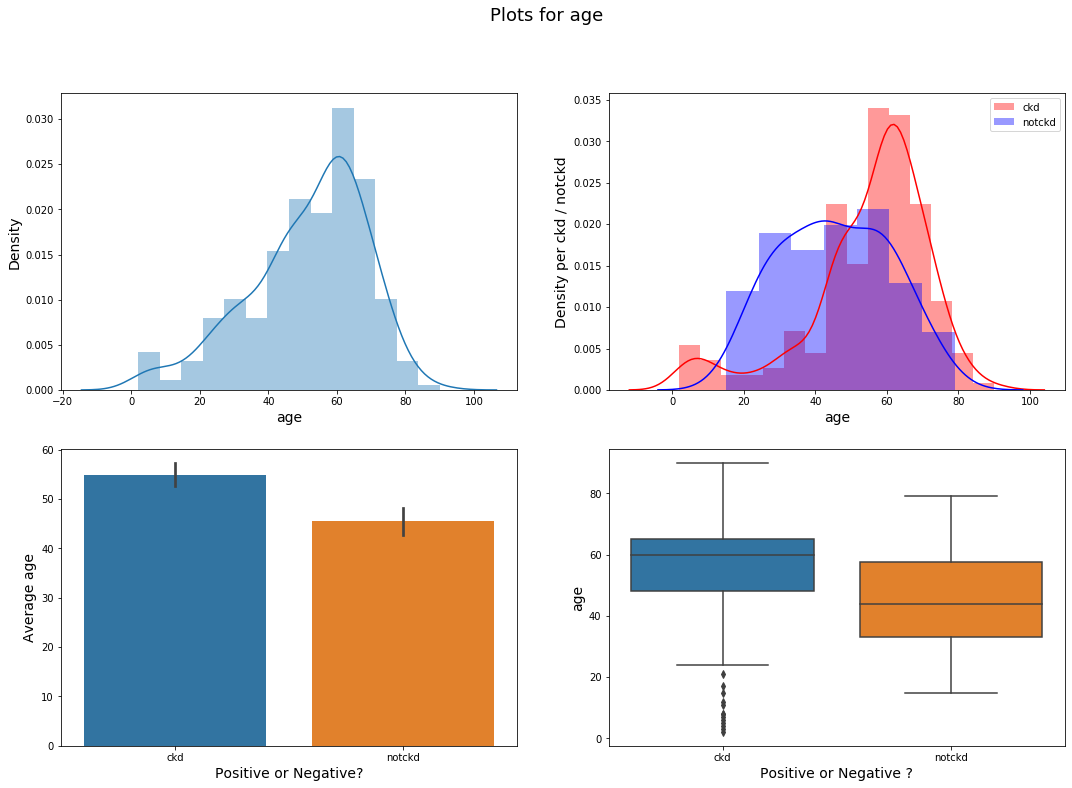

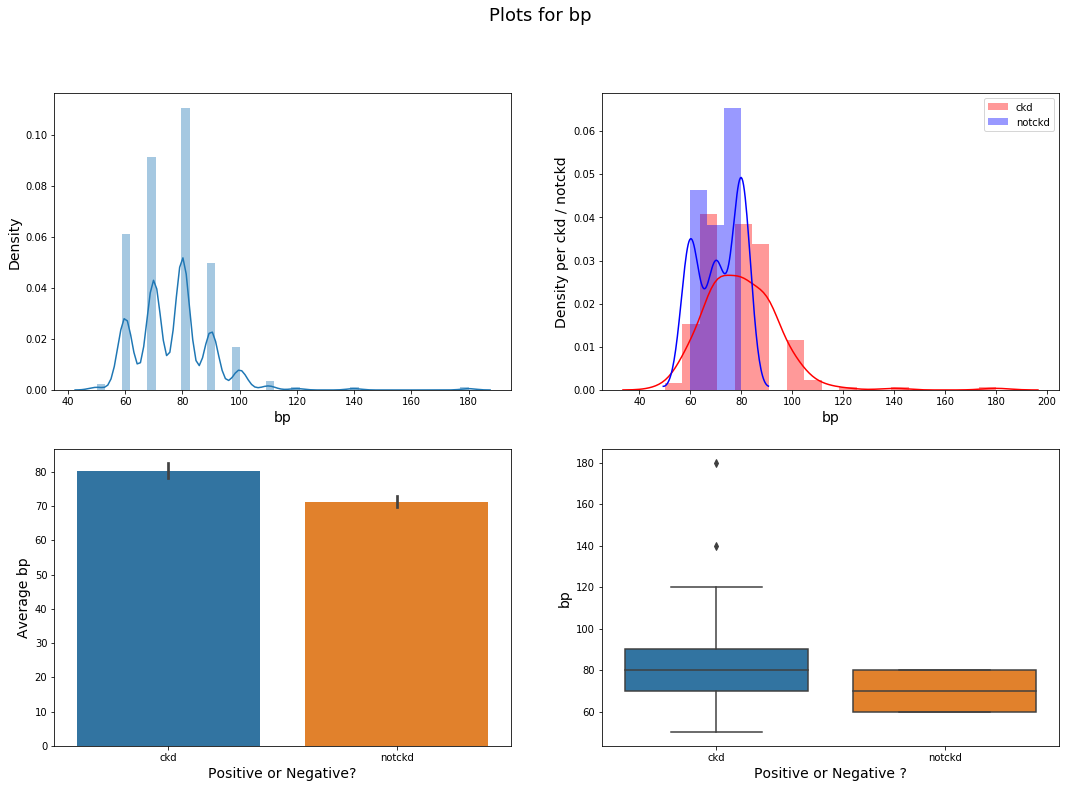

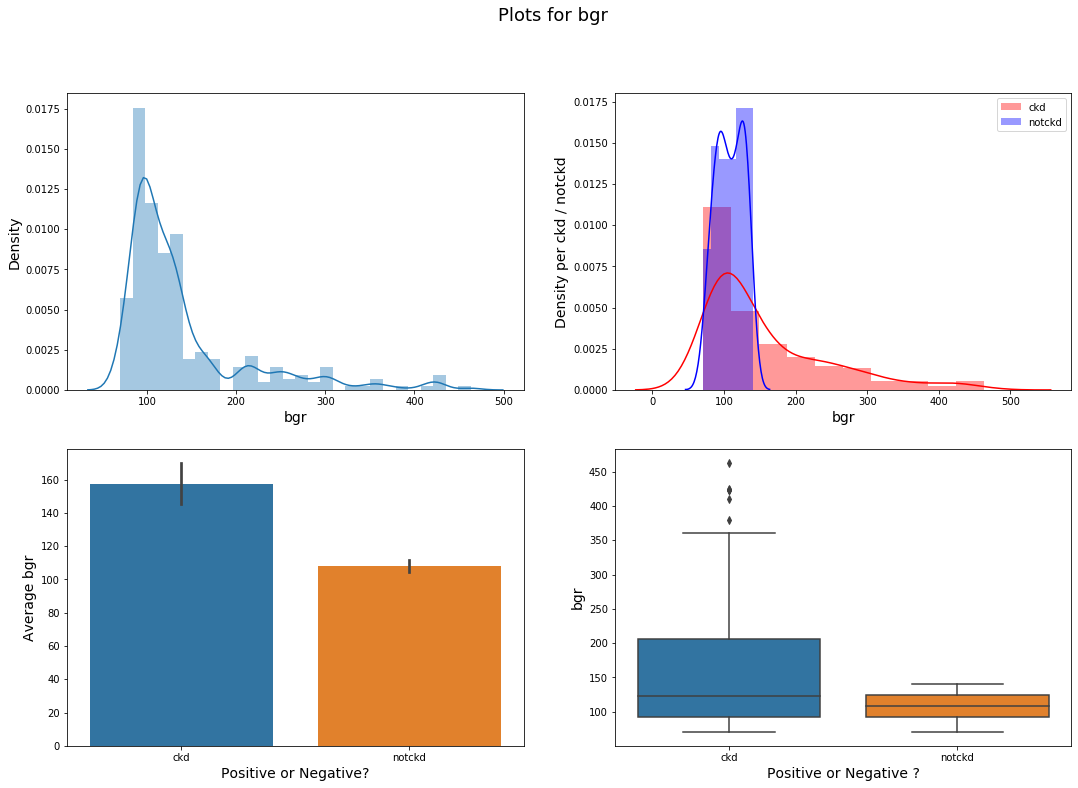

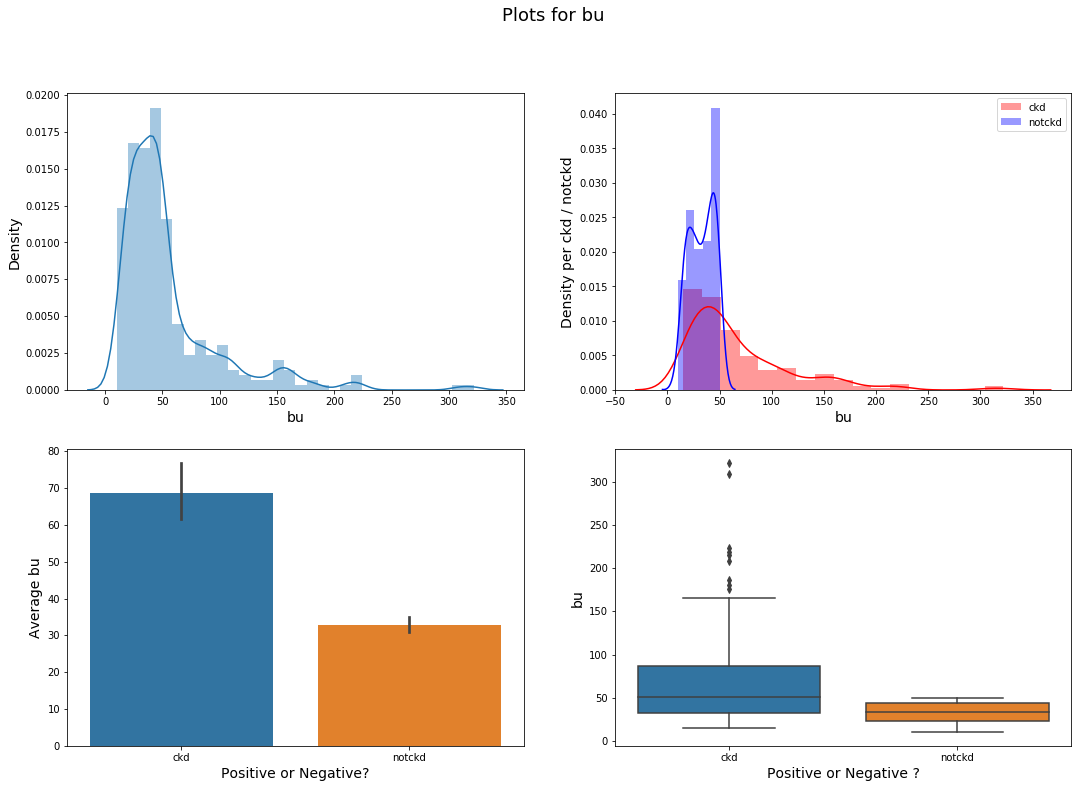

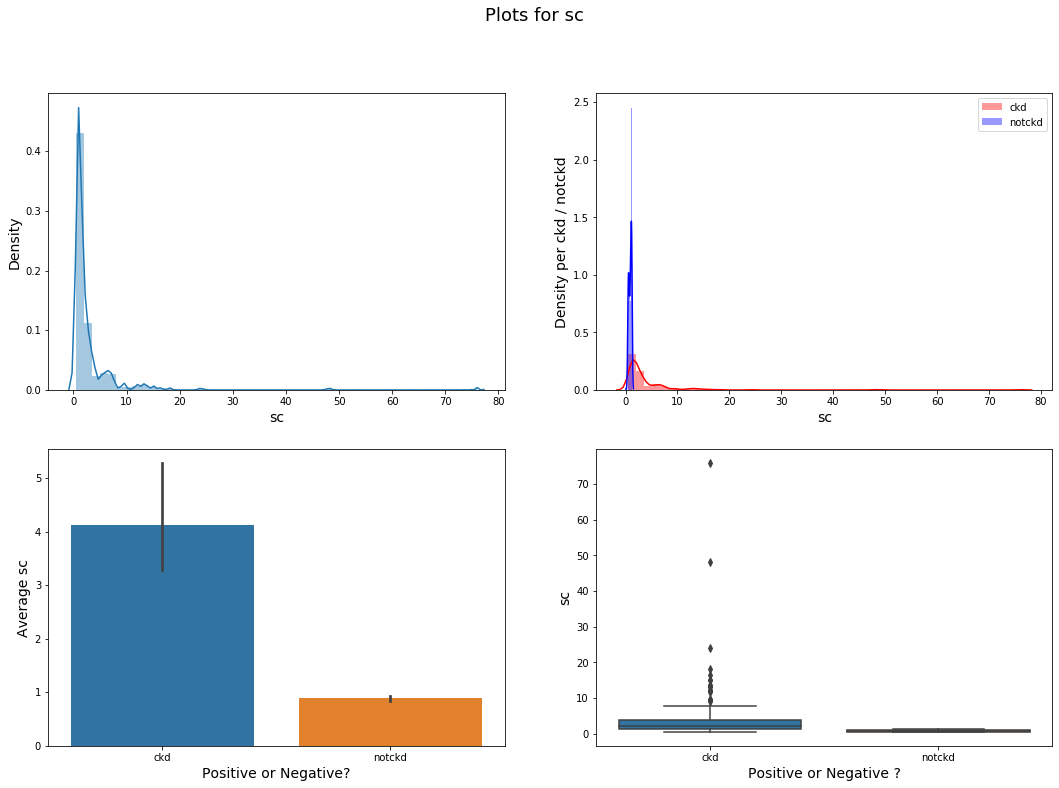

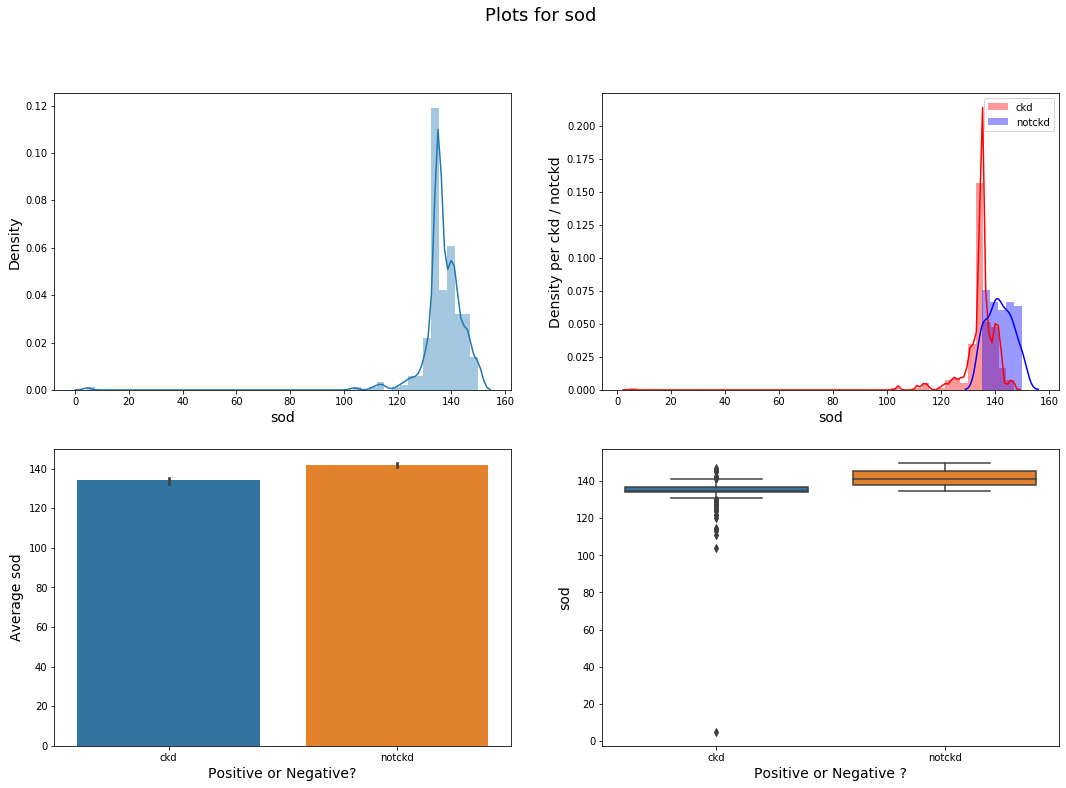

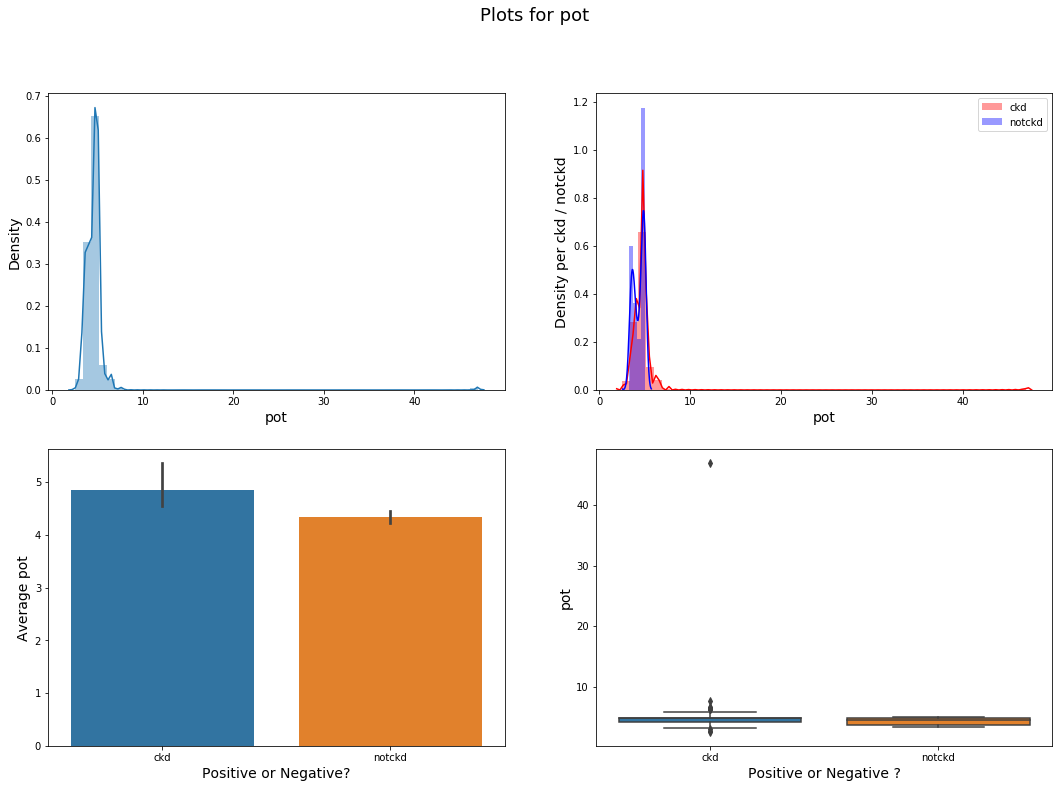

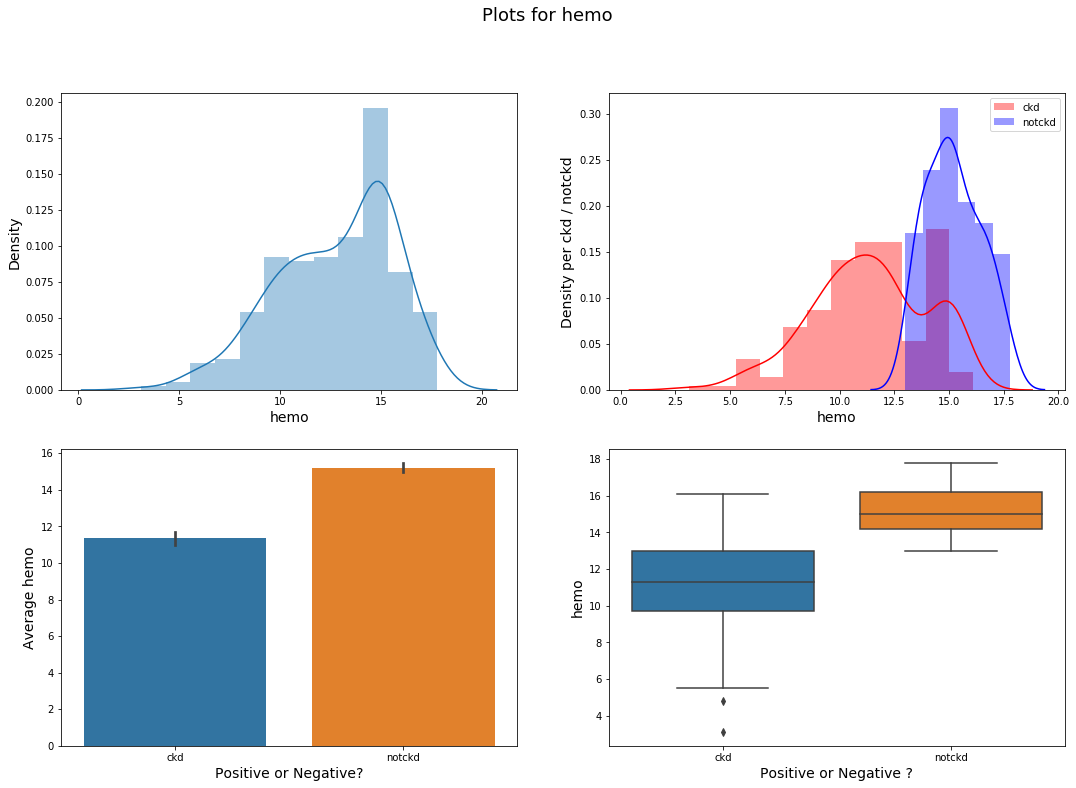

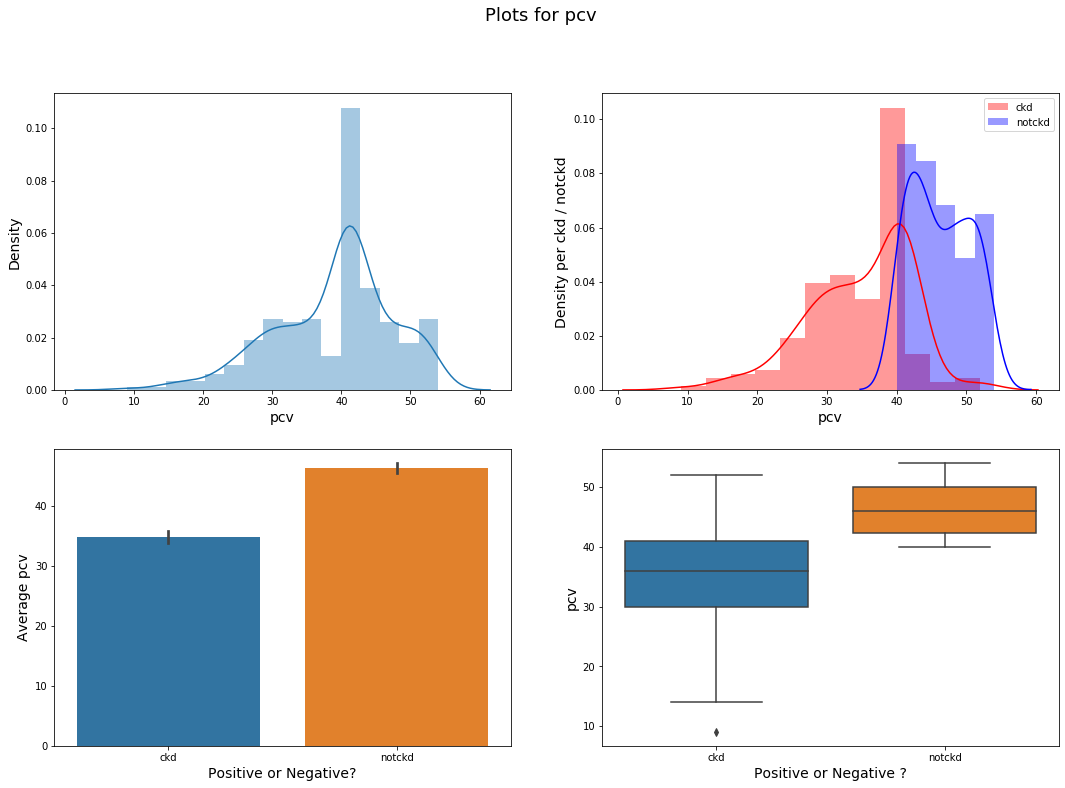

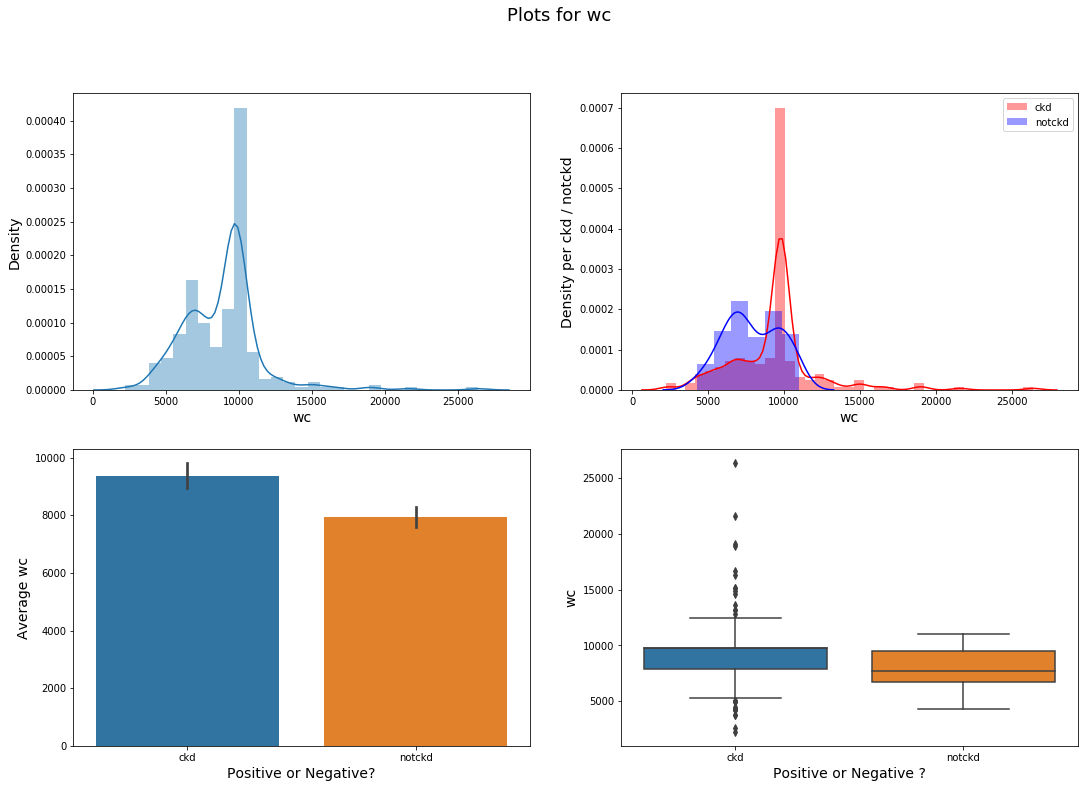

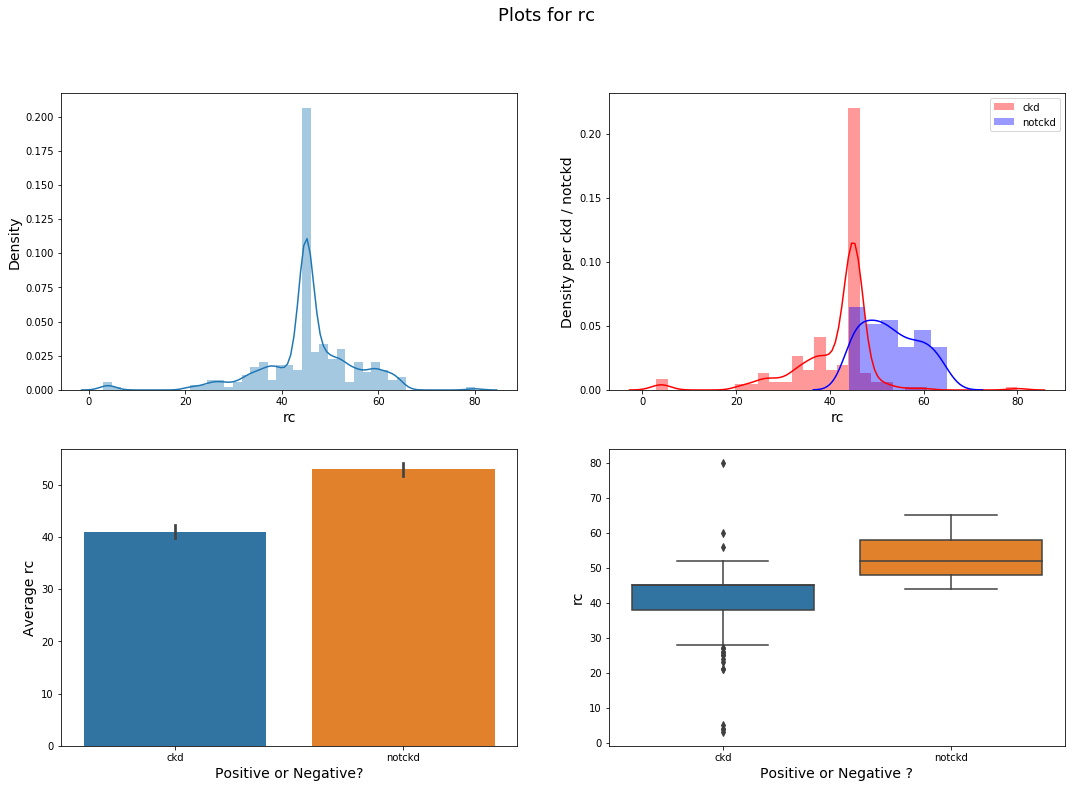

In [17]:
### Plotting Numeric Features
plot_numeric(train_data, numerical_features, 'classification')


Some features contain outliers.

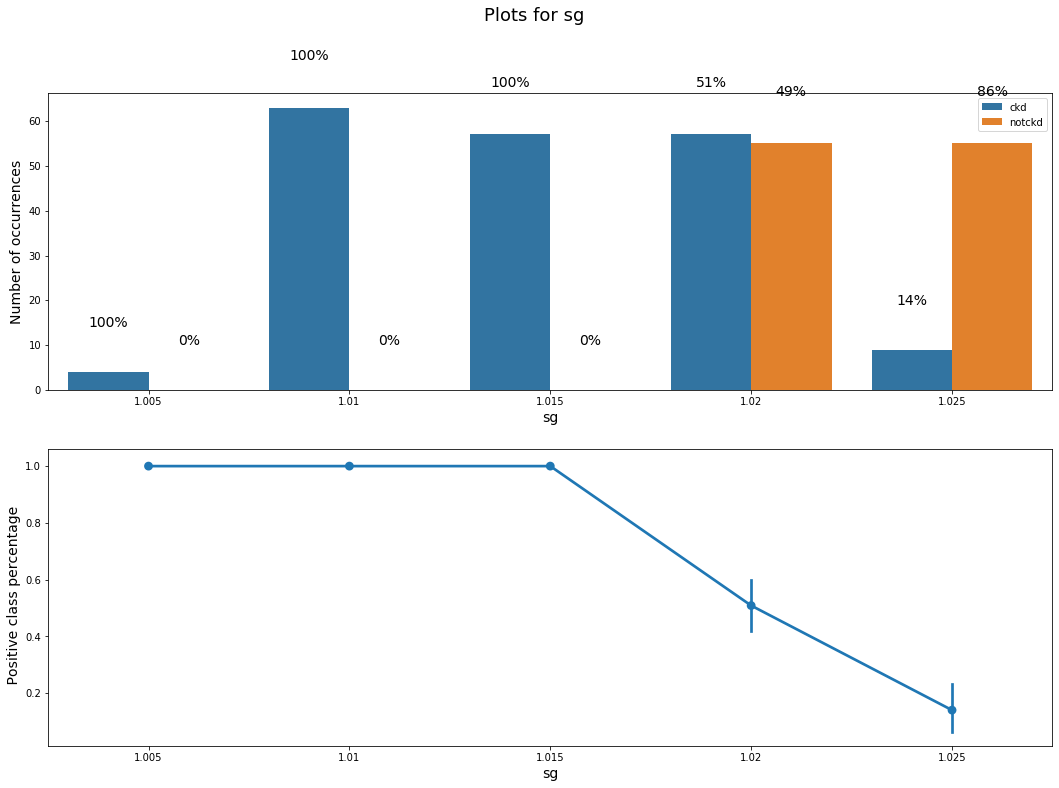

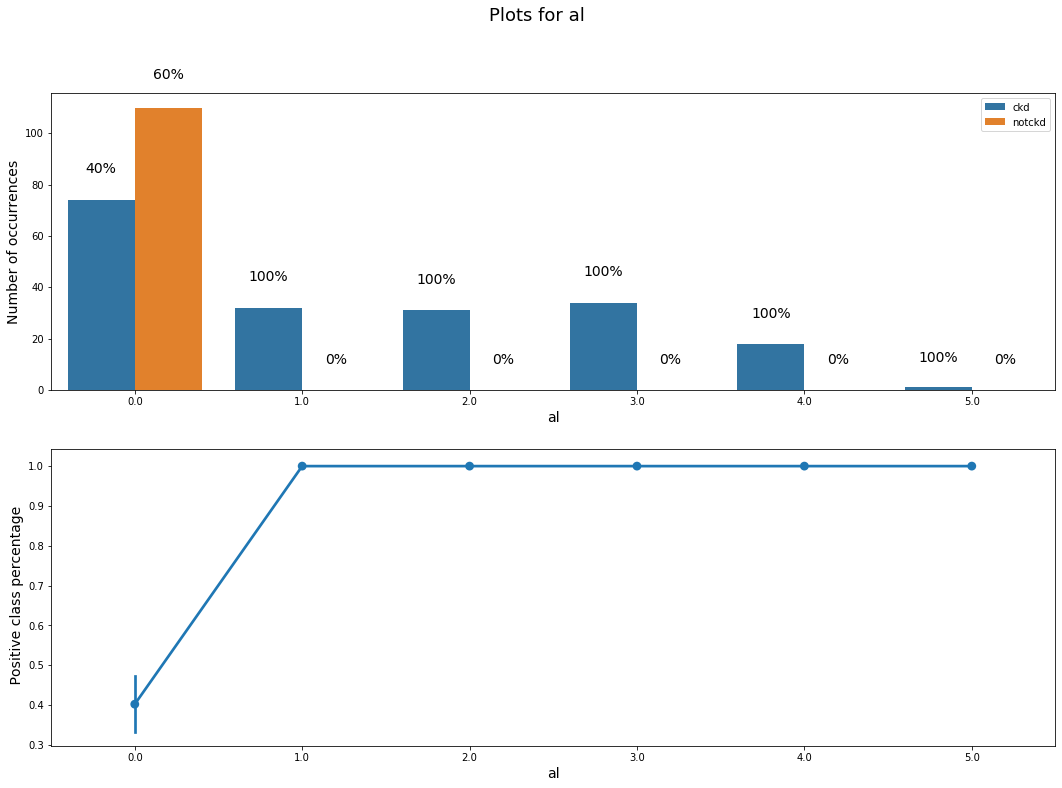

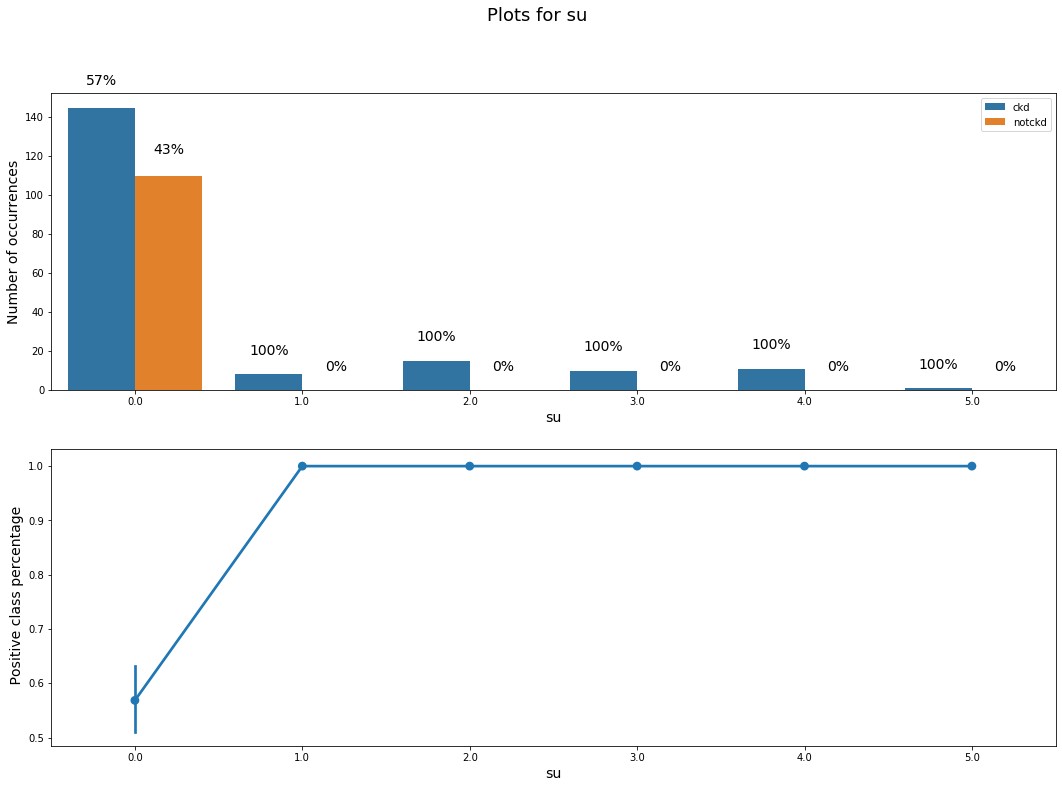

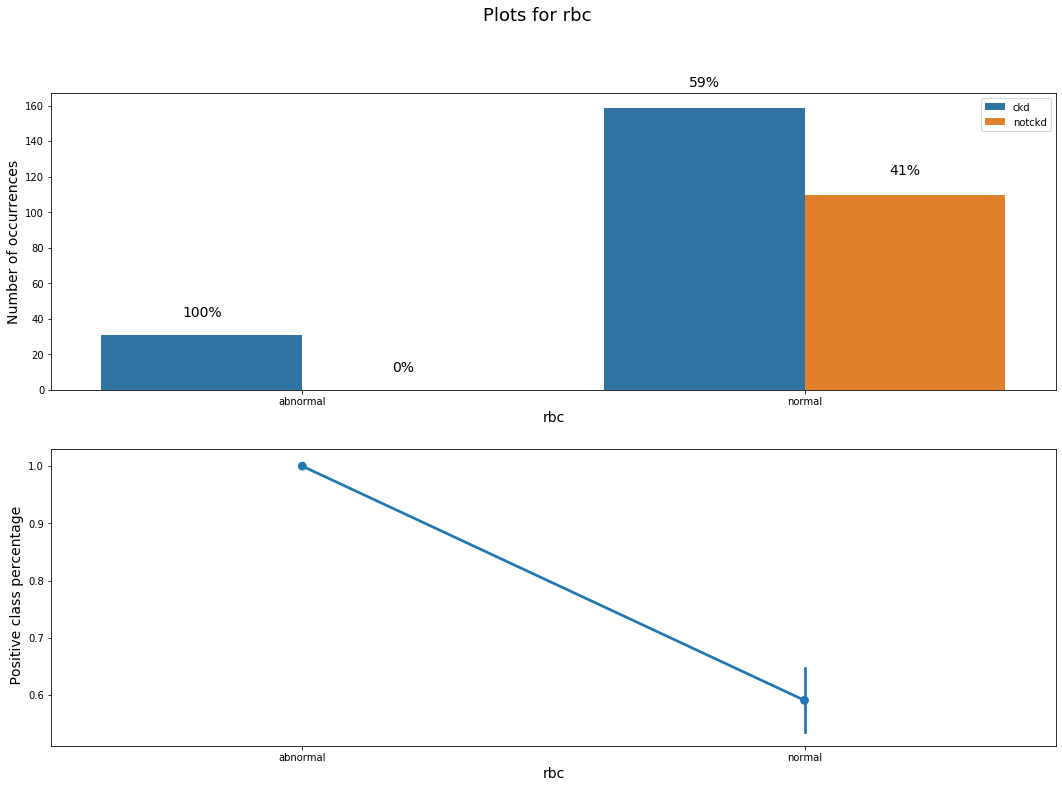

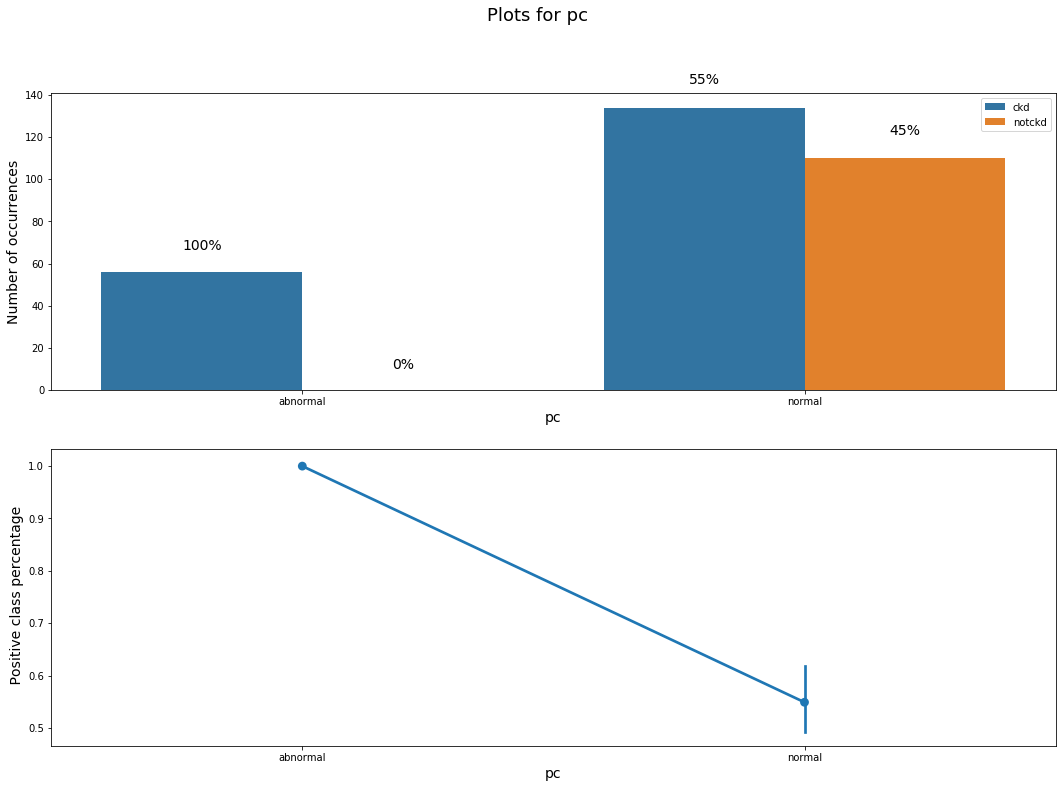

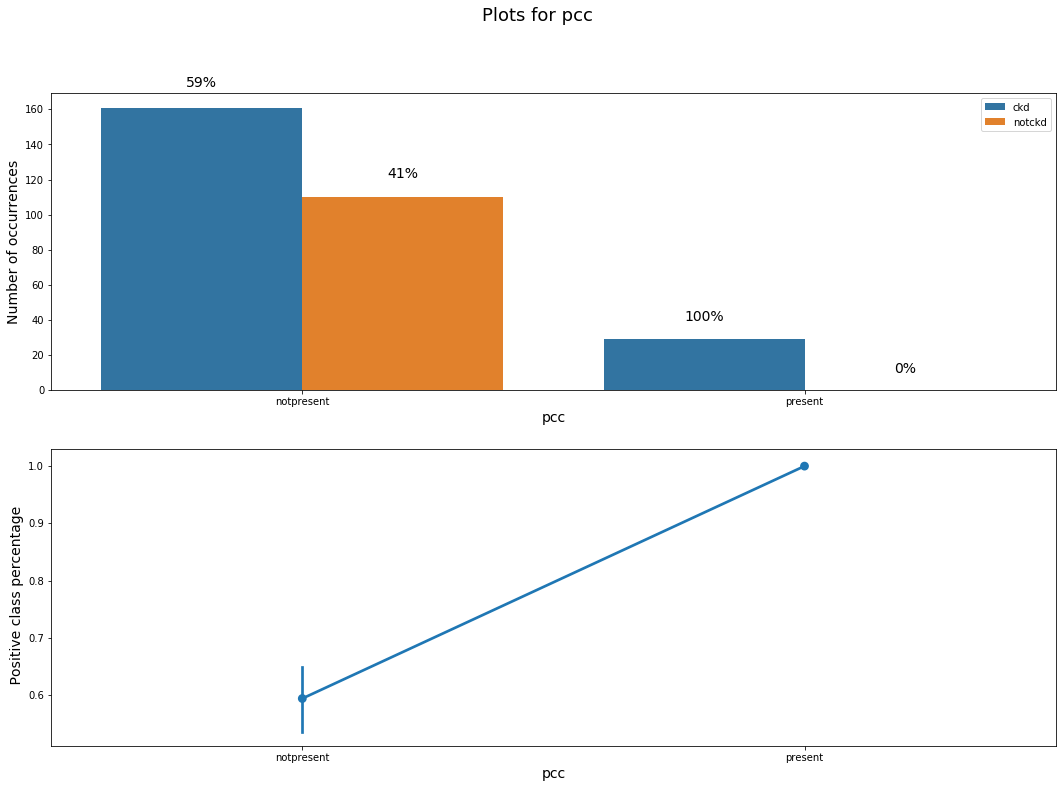

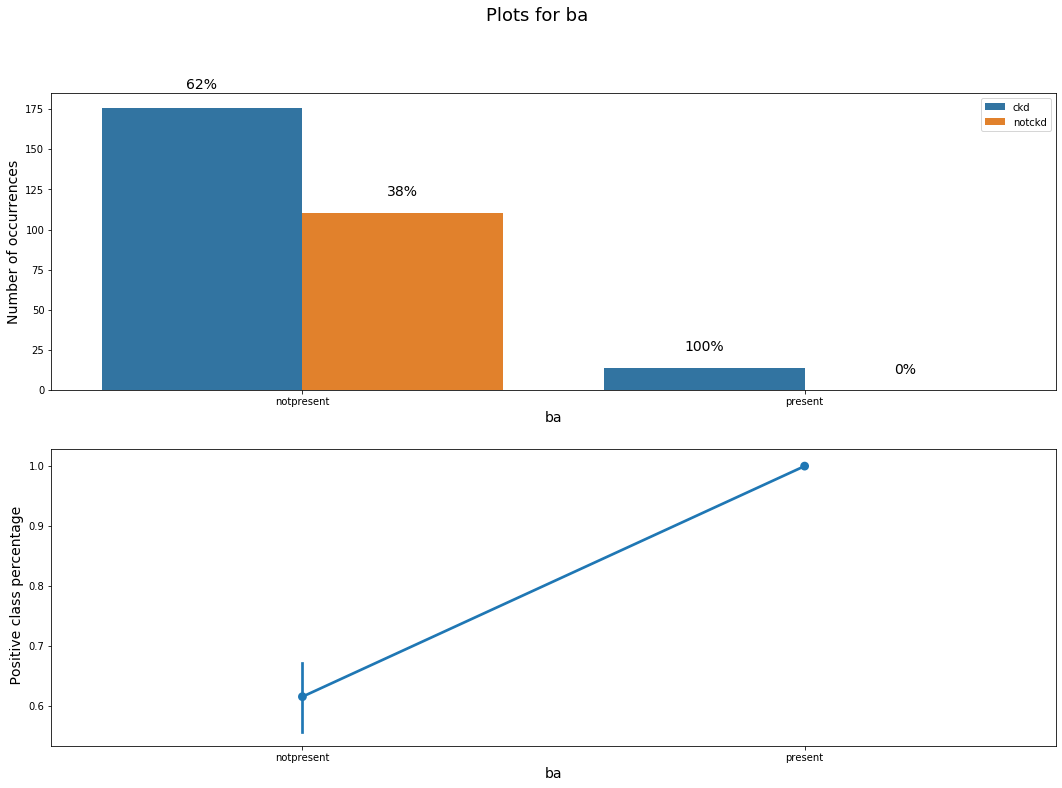

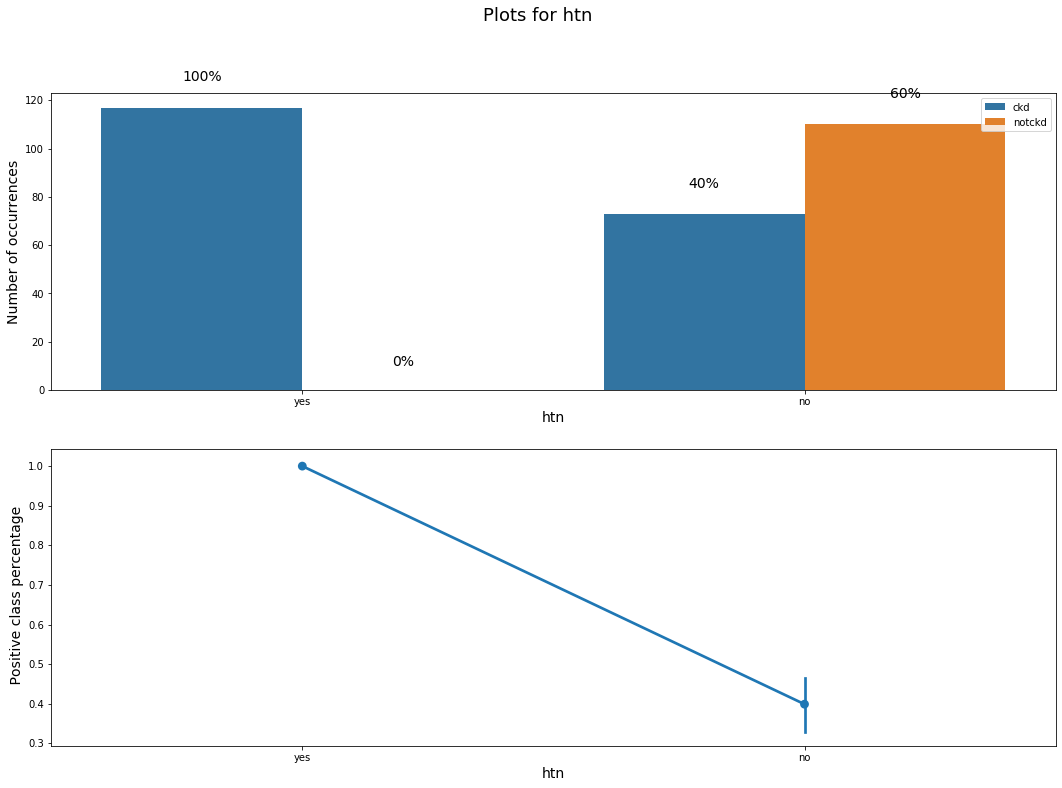

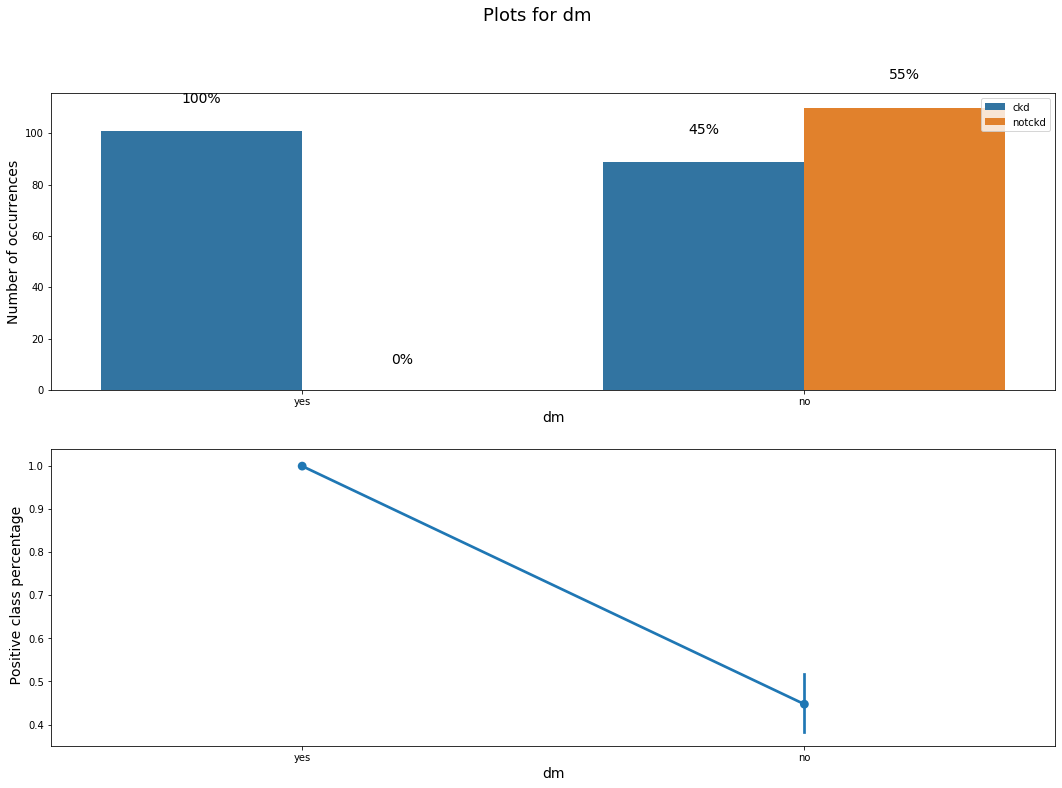

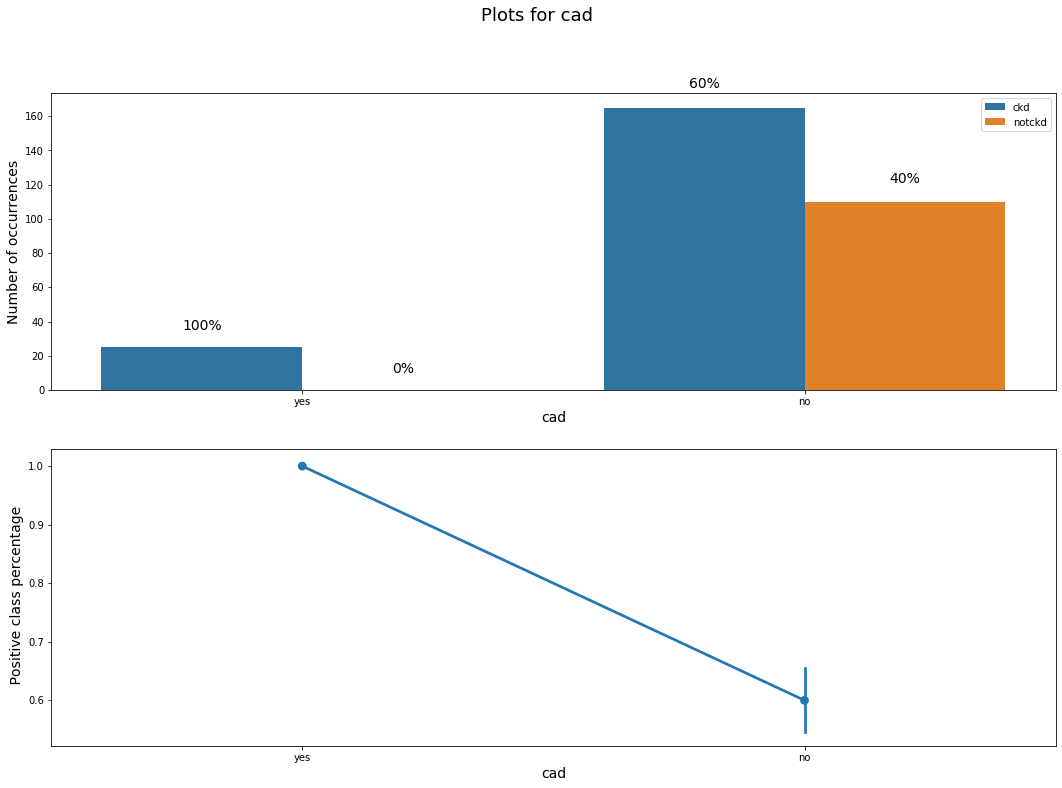

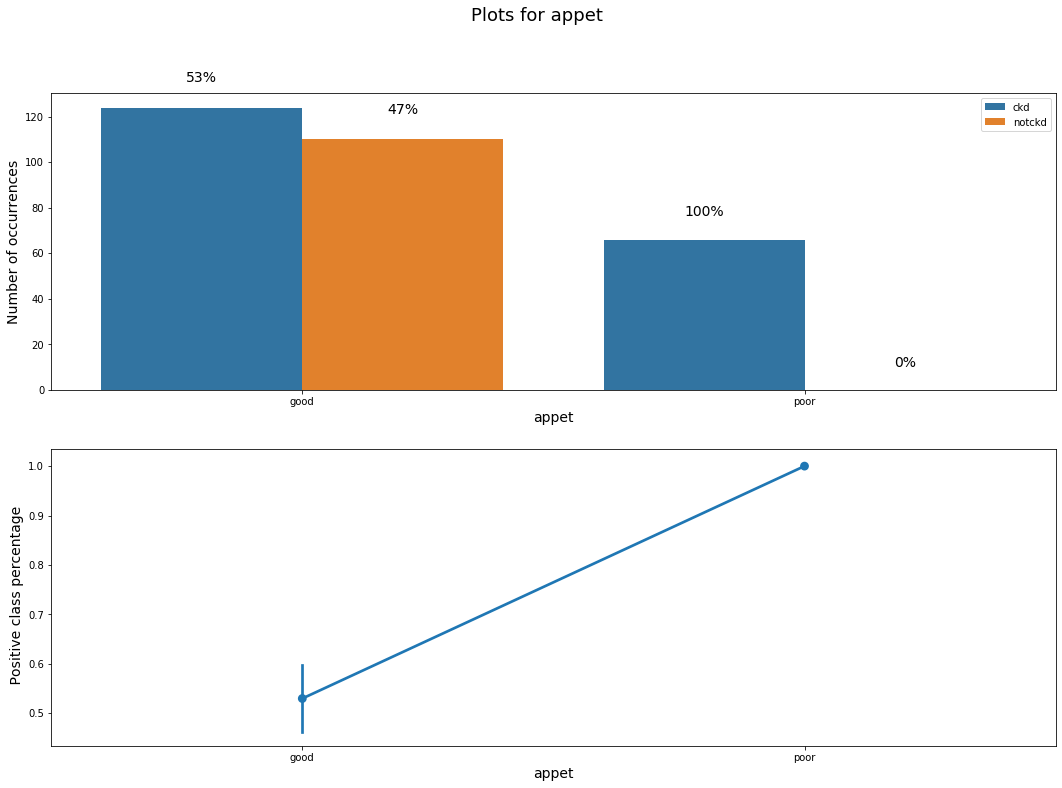

In [26]:
##### Plotting nominal Categorical Features    

plot_categ(train_data,"classification", categorical_features[:-2],positive='ckd')

    - Induviduals having some features (eg "su" > 0, "ane"=yes, etc) are necessarly healthy (notckd) .

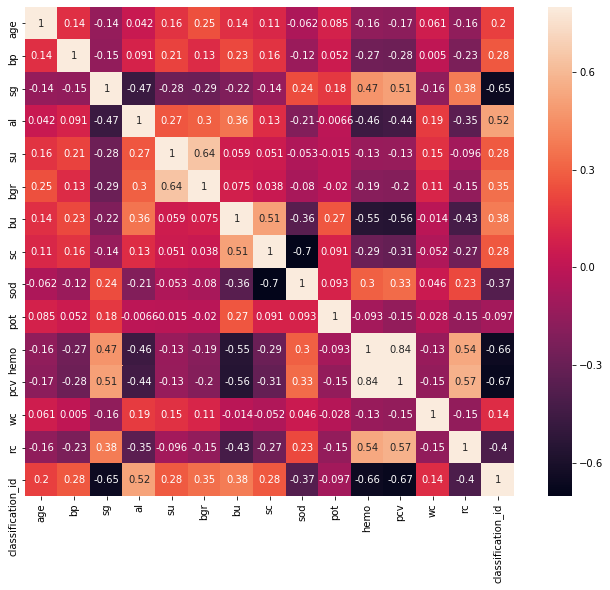

In [90]:
# Correlation Analyses

correlationMap(train_data,'classification')

As we have seen above in scatter plots, "hemo" and "pvc" are highly correlated

In [93]:
# We can delete highly correlated features because they can negatively impact some models (eg. trees)
train_data, test_data = train_data.drop("pcv", axis=1), test_data.drop("pcv", axis=1)
numerical_features = [f for f in numerical_features if f!="pcv"]
numerical_features

['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'wc', 'rc']

### Scaling and Encoding :

In [94]:
# Encoding categorical features
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

transf_train = featureEng(numerical_features, categorical_features).fit(train_data)
X_train = transf_train.transform(train_data)
y_train = train_data['classification'].replace({'ckd':1,'notckd':0}).values

In [95]:
#  get columns names after transformations
columns_eng = numerical_features + transf_train.transformers_[1][1].get_feature_names(categorical_features).tolist()

### PCA :

In [110]:
# PCA on numerical features
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(X_train[:,:len(numerical_features)])

# Keep two PC
principalDf = pd.DataFrame(data = principalComponents[:,:2]
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, pd.DataFrame(y_train)], axis = 1)

In [111]:
pca.explained_variance_

array([2.94359764, 1.40347816, 1.15627315, 1.02288096, 0.90198795,
       0.7585971 , 0.70347321, 0.51321804, 0.3854867 , 0.2444519 ])

5 variables respect Kaiser rule ie lambda>=1

In [112]:
pca.explained_variance_ratio_

array([0.29337857, 0.13987999, 0.11524189, 0.10194714, 0.08989813,
       0.07560684, 0.07011283, 0.05115073, 0.03842017, 0.02436371])

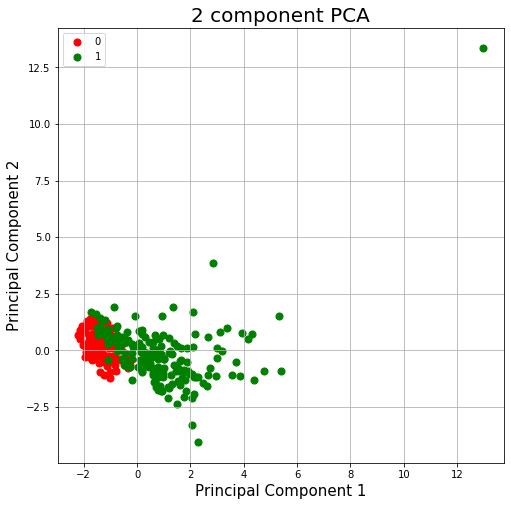

In [28]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf[0] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

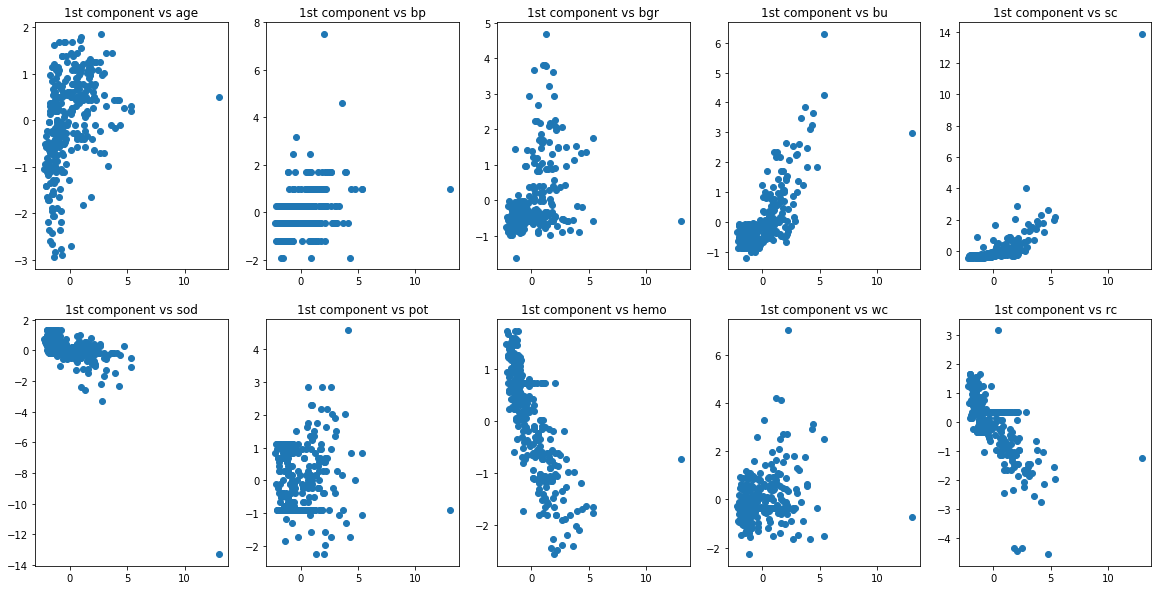

In [35]:
# Projection on first PC
n_axes = len(numerical_features)
_, axes = plt.subplots(ncols=5,nrows=2, figsize=(20,10))
col_id = 0
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        try :
            axes[i][j].scatter(principalComponents[:,0], X_train[:,col_id])
            axes[i][j].set_title(f'1st component vs {numerical_features[col_id]}')
            col_id = col_id+1
        except exception as e:
            print(e)
            break

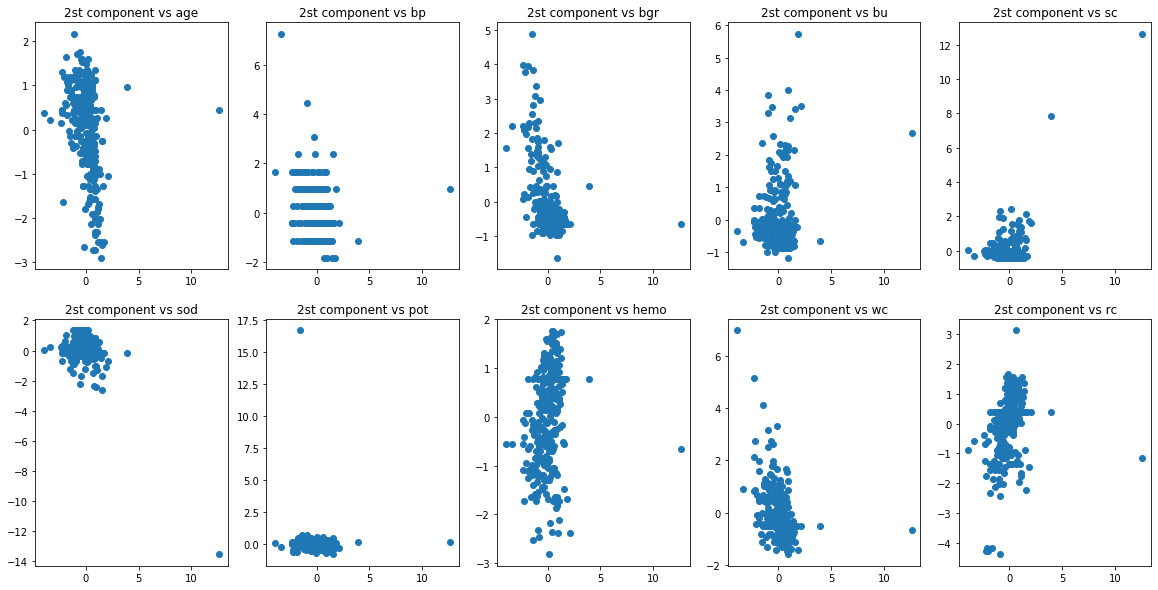

In [177]:
# # Projection on second PC
n_axes = len(numerical_features)
_, axes = plt.subplots(ncols=5,nrows=2, figsize=(20,10))
col_id = 0
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        try :
            axes[i][j].scatter(principalComponents[:,1], X_train[:,col_id])
            axes[i][j].set_title(f'2st component vs {columns_eng[col_id]}')
            col_id = col_id+1
        except :
            break

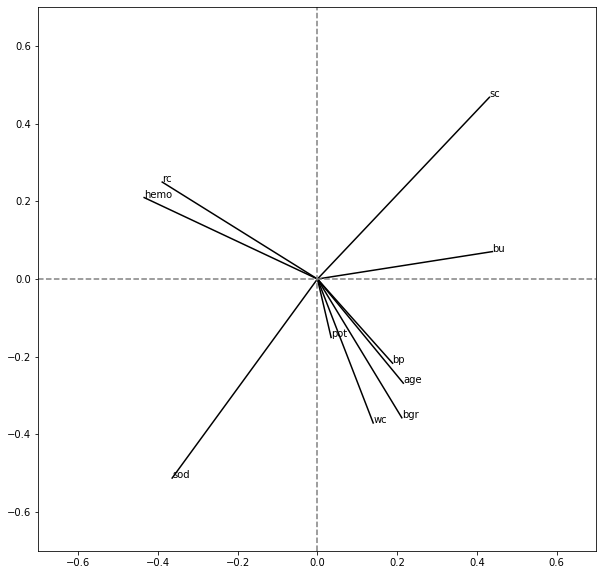

In [31]:
components = pca.components_
plt.figure(figsize=(10,10))
for i, (x, y) in enumerate(zip(components[0,:], components[1,:])):
    plt.plot([0, x], [0, y], color='k')
    plt.text(x, y, numerical_features[i])

plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim(-0.7, 0.7)
plt.ylim(-0.7, 0.7)

#### Feature Selection

In [36]:
X_train.shape

(300, 47)

Data has now 47 features. To reduce execution time and complexity we will select the most important ones to feed them to models.

In [117]:
from functools import partial
from sklearn.feature_selection import mutual_info_classif, SelectKBest

ndiscrete = len(transf_train.transformers_[1][1].get_feature_names(categorical_features))
discreteCol = np.arange(len(X_train[0])-ndiscrete,len(X_train[0]))

In [118]:
FSelector_mi = selectFeaturesTransformer(k=10,method="Mutual Information",discreteCol=discreteCol)
FSelector_rf = selectFeaturesTransformer(k=10,method="Random Forest")
FSelector_mi.fit(X_train,y_train)
FSelector_rf.fit(X_train,y_train)

selectFeaturesTransformer(discreteCol=[], k=10, method='Random Forest')

In [119]:
print("Top 10 selected by Mutual information")
print([columns_eng[i]  for i in FSelector_mi.order[:10]])
print("Top 10 selected by Random Forest")
print([columns_eng[i]  for i in FSelector_rf.order[:10]])

Top 10 selected by Mutual information
['hemo', 'sc', 'rc', 'htn_no', 'htn_yes', 'al_0.0', 'dm_yes', 'dm_no', 'sod', 'bu']
Top 10 selected by Random Forest
['hemo', 'sc', 'sod', 'htn_no', 'sg_1.025', 'rc', 'bu', 'dm_yes', 'dm_no', 'sg_1.01']


There is a big similarity between features selected by the two methods.
Unlike correlations study, Mutual information takes into consideration non linear relationship between variables. However, It does not consider the interaction between variables like RF does. Therefore, we will use feature selected by this latter.


In [120]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, RationalQuadratic, ExpSineSquared
from sklearn.linear_model import SGDClassifier
classifiers = [
    SGDClassifier(loss='log'), # for logistic regression
   KNeighborsClassifier(),
    SVC(),
    GaussianProcessClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    MLPClassifier(),
    GaussianNB()]

ker_rbf = ConstantKernel(1.0, constant_value_bounds="fixed") * RBF(1.0, length_scale_bounds="fixed")

ker_rq = ConstantKernel(1.0, constant_value_bounds="fixed") * RationalQuadratic(alpha=0.1, length_scale=1)

#ker_expsine = ConstantKernel(1.0, constant_value_bounds="fixed") * ExpSineSquared(1.0, 5.0, periodicity_bounds=(1e-2, 1e1))

kernel_list = [ker_rbf, ker_rq]

names = ["Logistic Regression with SGD", "Nearest Neighbors", "SVM", "Gaussian Process",
         "Decision Tree", "Random Forest","Gradient Boosting", "Neural Net",
         "Naive Bayes"]

parameters = {"Logistic Regression with SGD" : {'Classifier__penalty':['l1','l2',None],
                                               'Classifier__learning_rate' : ['constant','optimal','adaptive'],
                                               'Classifier__eta0' : [0.1]},
    "Nearest Neighbors" : {'Classifier__n_neighbors':[5,8,10]},
        'SVM':{'Classifier__kernel':['linear','rbf'],'Classifier__C':[0.1,0.5,1.,1.5]},
        "Gaussian Process":{"Classifier__kernel": kernel_list,
                            "Classifier__n_restarts_optimizer": [1, 2, 3]},
        "Decision Tree" : {"Classifier__max_features" : ['sqrt','log2',None],
                        "Classifier__max_depth":[10,30,50,None]}
        ,"Random Forest":{"Classifier__n_estimators":[8,10,20,50],"Classifier__max_features" : ['sqrt','log2',None],
                        "Classifier__max_depth":[10,30,50,None]},
       'Gradient Boosting':{"Classifier__max_features" : ['sqrt','log2',None],
                        "Classifier__max_depth":[2,3,10],
                        "Classifier__learning_rate":[1e-1,1e-2,1e-3]},
         "Neural Net" : {'Classifier__hidden_layer_sizes': [(20,20,20), (25,50,25), (50,50)],
                      'Classifier__activation': ['tanh', 'relu'],"Classifier__learning_rate_init":[1e-1,1e-2,1e-3]},
        "Naive Bayes" : {"Classifier__var_smoothing" : [1e-8, 1e-9]}
         }
parameters_featuresSelection = {'FeatureSelection__method':['RF'],'FeatureSelection__k':[10,20,30,47]}

In [134]:
results = train(X_train, y_train, classifiers, names,parameters, parameters_featuresSelection)    

#############  Logistic Regression with SGD  #############
Training time (Cross Validation =  True ) : 0.03972169425752428


,mean_test_score,std_test_score,params,classifier
17,0.990000,0.008186,"{'Classifier__eta0': 0.1, 'Classifier__learning_rate': 'optimal', 'Classifier__penalty': 'l2', 'FeatureSelection__k': 20, 'FeatureSelection__method': 'RF'}",Logistic Regression with SGD
3,0.986667,0.004715,"{'Classifier__eta0': 0.1, 'Classifier__learning_rate': 'constant', 'Classifier__penalty': 'l1', 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",Logistic Regression with SGD
10,0.986667,0.004715,"{'Classifier__eta0': 0.1, 'Classifier__learning_rate': 'constant', 'Classifier__penalty': None, 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Logistic Regression with SGD
11,0.986667,0.004715,"{'Classifier__eta0': 0.1, 'Classifier__learning_rate': 'constant', 'Classifier__penalty': None, 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",Logistic Regression with SGD
27,0.986667,0.004715,"{'Classifier__eta0': 0.1, 'Classifier__learning_rate': 'adaptive', 'Classifier__penalty': 'l1', 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",Logistic Regression with SGD
19,0.983333,0.012526,"{'Classifier__eta0': 0.1, 'Classifier__learning_rate': 'optimal', 'Classifier__penalty': 'l2', 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",Logistic Regression with SGD
6,0.983333,0.009428,"{'Classifier__eta0': 0.1, 'Classifier__learning_rate': 'constant', 'Classifier__penalty': 'l2', 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Logistic Regression with SGD
15,0.983333,0.009428,"{'Classifier__eta0': 0.1, 'Classifier__learning_rate': 'optimal', 'Classifier__penalty': 'l1', 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",Logistic Regression with SGD
26,0.983333,0.009428,"{'Classifier__eta0': 0.1, 'Classifier__learning_rate': 'adaptive', 'Classifier__penalty': 'l1', 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Logistic Regression with SGD
30,0.983333,0.009428,"{'Classifier__eta0': 0.1, 'Classifier__learning_rate': 'adaptive', 'Classifier__penalty': 'l2', 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Logistic Regression with SGD


#############  Nearest Neighbors  #############
Training time (Cross Validation =  True ) : 0.04750289519627889


,mean_test_score,std_test_score,params,classifier
0,0.956667,0.012569,"{'Classifier__n_neighbors': 5, 'FeatureSelection__k': 10, 'FeatureSelection__method': 'RF'}",Nearest Neighbors
1,0.926667,0.012055,"{'Classifier__n_neighbors': 5, 'FeatureSelection__k': 20, 'FeatureSelection__method': 'RF'}",Nearest Neighbors
8,0.916667,0.009999,"{'Classifier__n_neighbors': 10, 'FeatureSelection__k': 10, 'FeatureSelection__method': 'RF'}",Nearest Neighbors
4,0.913333,0.004128,"{'Classifier__n_neighbors': 8, 'FeatureSelection__k': 10, 'FeatureSelection__method': 'RF'}",Nearest Neighbors
2,0.910000,0.013546,"{'Classifier__n_neighbors': 5, 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Nearest Neighbors
3,0.900000,0.013476,"{'Classifier__n_neighbors': 5, 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",Nearest Neighbors
5,0.896667,0.028128,"{'Classifier__n_neighbors': 8, 'FeatureSelection__k': 20, 'FeatureSelection__method': 'RF'}",Nearest Neighbors
9,0.893333,0.016334,"{'Classifier__n_neighbors': 10, 'FeatureSelection__k': 20, 'FeatureSelection__method': 'RF'}",Nearest Neighbors
6,0.873333,0.023904,"{'Classifier__n_neighbors': 8, 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Nearest Neighbors
10,0.856667,0.011312,"{'Classifier__n_neighbors': 10, 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Nearest Neighbors


#############  SVM  #############
Training time (Cross Validation =  True ) : 0.03771963715553284


,mean_test_score,std_test_score,params,classifier
17,0.986667,0.018856,"{'Classifier__C': 1.0, 'Classifier__kernel': 'linear', 'FeatureSelection__k': 20, 'FeatureSelection__method': 'RF'}",SVM
25,0.983333,0.017007,"{'Classifier__C': 1.5, 'Classifier__kernel': 'linear', 'FeatureSelection__k': 20, 'FeatureSelection__method': 'RF'}",SVM
9,0.983333,0.016987,"{'Classifier__C': 0.5, 'Classifier__kernel': 'linear', 'FeatureSelection__k': 20, 'FeatureSelection__method': 'RF'}",SVM
18,0.980000,0.014142,"{'Classifier__C': 1.0, 'Classifier__kernel': 'linear', 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",SVM
26,0.980000,0.014142,"{'Classifier__C': 1.5, 'Classifier__kernel': 'linear', 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",SVM
27,0.976667,0.012513,"{'Classifier__C': 1.5, 'Classifier__kernel': 'linear', 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",SVM
19,0.976667,0.012433,"{'Classifier__C': 1.0, 'Classifier__kernel': 'linear', 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",SVM
10,0.973333,0.023570,"{'Classifier__C': 0.5, 'Classifier__kernel': 'linear', 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",SVM
22,0.973333,0.012366,"{'Classifier__C': 1.0, 'Classifier__kernel': 'rbf', 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",SVM
23,0.973333,0.012366,"{'Classifier__C': 1.0, 'Classifier__kernel': 'rbf', 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",SVM


#############  Gaussian Process  #############
Training time (Cross Validation =  True ) : 0.5456491808096567


,mean_test_score,std_test_score,params,classifier
14,0.980000,0.014142,"{'Classifier__kernel': 1**2 * RationalQuadratic(alpha=0.1, length_scale=1), 'Classifier__n_restarts_optimizer': 1, 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Gaussian Process
15,0.980000,0.014142,"{'Classifier__kernel': 1**2 * RationalQuadratic(alpha=0.1, length_scale=1), 'Classifier__n_restarts_optimizer': 1, 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",Gaussian Process
18,0.980000,0.014142,"{'Classifier__kernel': 1**2 * RationalQuadratic(alpha=0.1, length_scale=1), 'Classifier__n_restarts_optimizer': 2, 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Gaussian Process
19,0.980000,0.014142,"{'Classifier__kernel': 1**2 * RationalQuadratic(alpha=0.1, length_scale=1), 'Classifier__n_restarts_optimizer': 2, 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",Gaussian Process
22,0.980000,0.014142,"{'Classifier__kernel': 1**2 * RationalQuadratic(alpha=0.1, length_scale=1), 'Classifier__n_restarts_optimizer': 3, 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Gaussian Process
23,0.980000,0.014142,"{'Classifier__kernel': 1**2 * RationalQuadratic(alpha=0.1, length_scale=1), 'Classifier__n_restarts_optimizer': 3, 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",Gaussian Process
13,0.970000,0.000245,"{'Classifier__kernel': 1**2 * RationalQuadratic(alpha=0.1, length_scale=1), 'Classifier__n_restarts_optimizer': 1, 'FeatureSelection__k': 20, 'FeatureSelection__method': 'RF'}",Gaussian Process
17,0.970000,0.000245,"{'Classifier__kernel': 1**2 * RationalQuadratic(alpha=0.1, length_scale=1), 'Classifier__n_restarts_optimizer': 2, 'FeatureSelection__k': 20, 'FeatureSelection__method': 'RF'}",Gaussian Process
21,0.970000,0.000245,"{'Classifier__kernel': 1**2 * RationalQuadratic(alpha=0.1, length_scale=1), 'Classifier__n_restarts_optimizer': 3, 'FeatureSelection__k': 20, 'FeatureSelection__method': 'RF'}",Gaussian Process
1,0.953333,0.017390,"{'Classifier__kernel': 1**2 * RBF(length_scale=1), 'Classifier__n_restarts_optimizer': 1, 'FeatureSelection__k': 20, 'FeatureSelection__method': 'RF'}",Gaussian Process


#############  Decision Tree  #############
Training time (Cross Validation =  True ) : 0.04630120595296224


,mean_test_score,std_test_score,params,classifier
14,0.993333,0.009428,"{'Classifier__max_depth': 30, 'Classifier__max_features': 'sqrt', 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Decision Tree
21,0.993333,0.009428,"{'Classifier__max_depth': 30, 'Classifier__max_features': None, 'FeatureSelection__k': 20, 'FeatureSelection__method': 'RF'}",Decision Tree
33,0.993333,0.009428,"{'Classifier__max_depth': 50, 'Classifier__max_features': None, 'FeatureSelection__k': 20, 'FeatureSelection__method': 'RF'}",Decision Tree
45,0.993333,0.009428,"{'Classifier__max_depth': None, 'Classifier__max_features': None, 'FeatureSelection__k': 20, 'FeatureSelection__method': 'RF'}",Decision Tree
11,0.990000,0.008186,"{'Classifier__max_depth': 10, 'Classifier__max_features': None, 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",Decision Tree
34,0.990000,0.008186,"{'Classifier__max_depth': 50, 'Classifier__max_features': None, 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Decision Tree
47,0.990000,0.008186,"{'Classifier__max_depth': None, 'Classifier__max_features': None, 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",Decision Tree
23,0.986667,0.012486,"{'Classifier__max_depth': 30, 'Classifier__max_features': None, 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",Decision Tree
46,0.986667,0.012486,"{'Classifier__max_depth': None, 'Classifier__max_features': None, 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Decision Tree
10,0.986667,0.004715,"{'Classifier__max_depth': 10, 'Classifier__max_features': None, 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Decision Tree


#############  Random Forest  #############
Training time (Cross Validation =  True ) : 0.10775956387321155


,mean_test_score,std_test_score,params,classifier
14,1.000000,0.000000,"{'Classifier__max_depth': 10, 'Classifier__max_features': 'sqrt', 'Classifier__n_estimators': 50, 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Random Forest
15,1.000000,0.000000,"{'Classifier__max_depth': 10, 'Classifier__max_features': 'sqrt', 'Classifier__n_estimators': 50, 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",Random Forest
21,1.000000,0.000000,"{'Classifier__max_depth': 10, 'Classifier__max_features': 'log2', 'Classifier__n_estimators': 10, 'FeatureSelection__k': 20, 'FeatureSelection__method': 'RF'}",Random Forest
26,1.000000,0.000000,"{'Classifier__max_depth': 10, 'Classifier__max_features': 'log2', 'Classifier__n_estimators': 20, 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Random Forest
27,1.000000,0.000000,"{'Classifier__max_depth': 10, 'Classifier__max_features': 'log2', 'Classifier__n_estimators': 20, 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",Random Forest
...,...,...,...,...
152,0.970000,0.000245,"{'Classifier__max_depth': None, 'Classifier__max_features': 'sqrt', 'Classifier__n_estimators': 20, 'FeatureSelection__k': 10, 'FeatureSelection__method': 'RF'}",Random Forest
178,0.970000,0.000245,"{'Classifier__max_depth': None, 'Classifier__max_features': None, 'Classifier__n_estimators': 8, 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Random Forest
48,0.966667,0.009217,"{'Classifier__max_depth': 30, 'Classifier__max_features': 'sqrt', 'Classifier__n_estimators': 8, 'FeatureSelection__k': 10, 'FeatureSelection__method': 'RF'}",Random Forest
81,0.966667,0.004964,"{'Classifier__max_depth': 30, 'Classifier__max_features': None, 'Classifier__n_estimators': 8, 'FeatureSelection__k': 20, 'FeatureSelection__method': 'RF'}",Random Forest


#############  Gradient Boosting  #############
Training time (Cross Validation =  True ) : 0.18253015147315133


,mean_test_score,std_test_score,params,classifier
3,1.000000,0.000000,"{'Classifier__learning_rate': 0.1, 'Classifier__max_depth': 2, 'Classifier__max_features': 'sqrt', 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",Gradient Boosting
7,1.000000,0.000000,"{'Classifier__learning_rate': 0.1, 'Classifier__max_depth': 2, 'Classifier__max_features': 'log2', 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",Gradient Boosting
14,1.000000,0.000000,"{'Classifier__learning_rate': 0.1, 'Classifier__max_depth': 3, 'Classifier__max_features': 'sqrt', 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Gradient Boosting
25,1.000000,0.000000,"{'Classifier__learning_rate': 0.1, 'Classifier__max_depth': 10, 'Classifier__max_features': 'sqrt', 'FeatureSelection__k': 20, 'FeatureSelection__method': 'RF'}",Gradient Boosting
26,1.000000,0.000000,"{'Classifier__learning_rate': 0.1, 'Classifier__max_depth': 10, 'Classifier__max_features': 'sqrt', 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Gradient Boosting
...,...,...,...,...
103,0.623333,0.002569,"{'Classifier__learning_rate': 0.001, 'Classifier__max_depth': 10, 'Classifier__max_features': 'log2', 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",Gradient Boosting
104,0.623333,0.002569,"{'Classifier__learning_rate': 0.001, 'Classifier__max_depth': 10, 'Classifier__max_features': None, 'FeatureSelection__k': 10, 'FeatureSelection__method': 'RF'}",Gradient Boosting
105,0.623333,0.002569,"{'Classifier__learning_rate': 0.001, 'Classifier__max_depth': 10, 'Classifier__max_features': None, 'FeatureSelection__k': 20, 'FeatureSelection__method': 'RF'}",Gradient Boosting
106,0.623333,0.002569,"{'Classifier__learning_rate': 0.001, 'Classifier__max_depth': 10, 'Classifier__max_features': None, 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Gradient Boosting


#############  Neural Net  #############
Training time (Cross Validation =  True ) : 0.44613440831502277


,mean_test_score,std_test_score,params,classifier
29,0.990000,0.008247,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (50, 50), 'Classifier__learning_rate_init': 0.01, 'FeatureSelection__k': 20, 'FeatureSelection__method': 'RF'}",Neural Net
38,0.990000,0.008145,"{'Classifier__activation': 'relu', 'Classifier__hidden_layer_sizes': (20, 20, 20), 'Classifier__learning_rate_init': 0.1, 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Neural Net
54,0.990000,0.008145,"{'Classifier__activation': 'relu', 'Classifier__hidden_layer_sizes': (25, 50, 25), 'Classifier__learning_rate_init': 0.01, 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Neural Net
58,0.986667,0.012486,"{'Classifier__activation': 'relu', 'Classifier__hidden_layer_sizes': (25, 50, 25), 'Classifier__learning_rate_init': 0.001, 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Neural Net
39,0.986667,0.012459,"{'Classifier__activation': 'relu', 'Classifier__hidden_layer_sizes': (20, 20, 20), 'Classifier__learning_rate_init': 0.1, 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",Neural Net
...,...,...,...,...
68,0.940000,0.007913,"{'Classifier__activation': 'relu', 'Classifier__hidden_layer_sizes': (50, 50), 'Classifier__learning_rate_init': 0.001, 'FeatureSelection__k': 10, 'FeatureSelection__method': 'RF'}",Neural Net
36,0.933333,0.012994,"{'Classifier__activation': 'relu', 'Classifier__hidden_layer_sizes': (20, 20, 20), 'Classifier__learning_rate_init': 0.1, 'FeatureSelection__k': 10, 'FeatureSelection__method': 'RF'}",Neural Net
14,0.930000,0.028963,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (25, 50, 25), 'Classifier__learning_rate_init': 0.1, 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Neural Net
56,0.926667,0.026791,"{'Classifier__activation': 'relu', 'Classifier__hidden_layer_sizes': (25, 50, 25), 'Classifier__learning_rate_init': 0.001, 'FeatureSelection__k': 10, 'FeatureSelection__method': 'RF'}",Neural Net


#############  Naive Bayes  #############
Training time (Cross Validation =  True ) : 0.0500621497631073


,mean_test_score,std_test_score,params,classifier
2,0.986667,0.012459,"{'Classifier__var_smoothing': 1e-08, 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Naive Bayes
3,0.986667,0.012459,"{'Classifier__var_smoothing': 1e-08, 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",Naive Bayes
6,0.986667,0.012459,"{'Classifier__var_smoothing': 1e-09, 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Naive Bayes
7,0.986667,0.012459,"{'Classifier__var_smoothing': 1e-09, 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",Naive Bayes
1,0.976667,0.012513,"{'Classifier__var_smoothing': 1e-08, 'FeatureSelection__k': 20, 'FeatureSelection__method': 'RF'}",Naive Bayes
5,0.976667,0.012513,"{'Classifier__var_smoothing': 1e-09, 'FeatureSelection__k': 20, 'FeatureSelection__method': 'RF'}",Naive Bayes
0,0.903333,0.036939,"{'Classifier__var_smoothing': 1e-08, 'FeatureSelection__k': 10, 'FeatureSelection__method': 'RF'}",Naive Bayes
4,0.903333,0.036939,"{'Classifier__var_smoothing': 1e-09, 'FeatureSelection__k': 10, 'FeatureSelection__method': 'RF'}",Naive Bayes


In [135]:
results.groupby('classifier').head(3)

,mean_test_score,std_test_score,params,classifier
166,1.000000,0.000000,"{'Classifier__max_depth': 10, 'Classifier__max_features': 'sqrt', 'Classifier__n_estimators': 50, 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Random Forest
167,1.000000,0.000000,"{'Classifier__max_depth': 10, 'Classifier__max_features': 'sqrt', 'Classifier__n_estimators': 50, 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",Random Forest
173,1.000000,0.000000,"{'Classifier__max_depth': 10, 'Classifier__max_features': 'log2', 'Classifier__n_estimators': 10, 'FeatureSelection__k': 20, 'FeatureSelection__method': 'RF'}",Random Forest
347,1.000000,0.000000,"{'Classifier__learning_rate': 0.1, 'Classifier__max_depth': 2, 'Classifier__max_features': 'sqrt', 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",Gradient Boosting
351,1.000000,0.000000,"{'Classifier__learning_rate': 0.1, 'Classifier__max_depth': 2, 'Classifier__max_features': 'log2', 'FeatureSelection__k': 47, 'FeatureSelection__method': 'RF'}",Gradient Boosting
358,1.000000,0.000000,"{'Classifier__learning_rate': 0.1, 'Classifier__max_depth': 3, 'Classifier__max_features': 'sqrt', 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Gradient Boosting
118,0.993333,0.009428,"{'Classifier__max_depth': 30, 'Classifier__max_features': 'sqrt', 'FeatureSelection__k': 30, 'FeatureSelection__method': 'RF'}",Decision Tree
125,0.993333,0.009428,"{'Classifier__max_depth': 30, 'Classifier__max_features': None, 'FeatureSelection__k': 20, 'FeatureSelection__method': 'RF'}",Decision Tree
137,0.993333,0.009428,"{'Classifier__max_depth': 50, 'Classifier__max_features': None, 'FeatureSelection__k': 20, 'FeatureSelection__method': 'RF'}",Decision Tree
481,0.990000,0.008247,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (50, 50), 'Classifier__learning_rate_init': 0.01, 'FeatureSelection__k': 20, 'FeatureSelection__method': 'RF'}",Neural Net


For the same performance, the third combination of parameters for Random Forset is the simplest. It is the one we will use for test (Occam’s Razor).


In [136]:
# apply transformations on test data
test_data = transf_alphaN.transform(test_data)
test_data = transf_num.transform(test_data)
test_data = transf_Missing.transform(test_data)


In [143]:
y_test = test_data['classification'].replace({'ckd':1,'notckd':0}).values
X_test = transf_train.transform(test_data)

In [97]:
X_test

array([[ 0.3593597 ,  0.34225936, -0.55041289, ...,  0.        ,
         0.        ,  1.        ],
       [-1.02501153,  1.13821136, -0.63871442, ...,  0.        ,
         1.        ,  0.        ],
       [-0.62123659,  0.34225936, -0.84054649, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.5324061 , -0.45369264, -0.55041289, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.7054525 ,  1.93416336, -0.81531748, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.85909519, -0.45369264, -0.51256937, ...,  0.        ,
         0.        ,  1.        ]])

In [147]:
model_selected = results.iloc[2]
model = classifiers[names.index(model_selected['classifier'])]
param = {key.split('__')[1]:val for key,val in model_selected['params'].items() if 'FeatureSelection' not in key } 
model.set_params(**param)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [99]:
model.fit(X_train,y_train)
model.score(X_test, y_test)

1.0

In [149]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test), target_names=['notckd','ckd']))

              precision    recall  f1-score   support

      notckd       1.00      1.00      1.00        37
         ckd       1.00      1.00      1.00        63

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



## 2). Banknote Authentication

In [150]:
data = pd.read_csv(r'./data/data_banknote_authentication.txt', names  = ['variance','skewness','curtoisis','entropy','classification'])
# Split it to train and test
train_data, test_data = train_test_split(data) 
train_data

,variance,skewness,curtoisis,entropy,classification
1332,0.90407,3.3708,-4.4987,-3.69650,1
0,3.62160,8.6661,-2.8073,-0.44699,0
176,0.19081,9.1297,-3.7250,-5.82240,0
680,3.44650,2.9508,1.0271,0.54610,0
455,2.66820,10.2160,-3.4414,-4.00690,0
...,...,...,...,...,...
1050,-5.88180,7.6584,0.5558,-2.91550,1
430,1.56910,6.3465,-0.1828,-2.40990,0
571,2.25170,-5.1422,4.2916,-1.24870,0
839,-1.34140,-2.0776,2.8093,0.60688,1


In [151]:
# data information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1029 entries, 1332 to 908
Data columns (total 5 columns):
variance          1029 non-null float64
skewness          1029 non-null float64
curtoisis         1029 non-null float64
entropy           1029 non-null float64
classification    1029 non-null int64
dtypes: float64(4), int64(1)
memory usage: 48.2 KB


In [152]:
# Statistical description
train_data.describe()

,variance,skewness,curtoisis,entropy,classification
count,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
mean,0.503202,2.002012,1.344116,-1.210427,0.430515
std,2.861550,5.872898,4.305430,2.130930,0.495389
min,-7.042100,-13.773100,-5.286100,-7.785300,0.000000
25%,-1.706400,-1.777500,-1.691700,-2.456500,0.000000
50%,0.570600,2.427300,0.628630,-0.590530,0.000000
75%,2.888000,6.841000,3.089500,0.412910,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [153]:
numerical_features = ['variance','skewness','curtoisis','entropy']

In [154]:
# Remove non alphanumeric 
transf_alphaN = FunctionTransformer(removeNonAlphanumeric, validate= False)
transf_num = FunctionTransformer(toNumeric, validate= False)
train_data = transf_alphaN.transform(train_data)
train_data = transf_num.transform(train_data)

In [155]:
# Get columns with null values
print("Columns with null values before imputing")
print(train_data.columns[train_data.isna().any()].tolist())
# Handle missing values
#df,imput_dict = handleMissing(train_data, "most_frequent")
transf_Missing = HandleMissingTransformer(method="median")
train_data = transf_Missing.fit(train_data).transform(train_data)
print("Columns with null values after imputing")
print(train_data.columns[train_data.isna().any()].tolist())

Columns with null values before imputing
[]
For non numeric columns, most frequent strategy is used
Columns with null values after imputing
[]


#### Data Viz

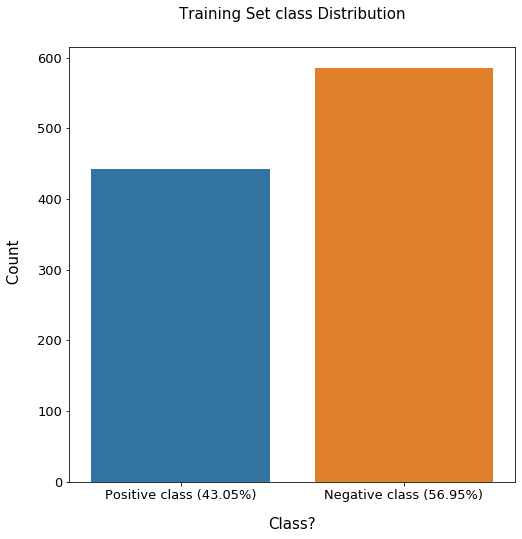

In [156]:
### Target variable exploration
target_variable_exploration(train_data, "classification", 'Class?', ' Count', 'Training Set class Distribution')

The classes are  balanced.

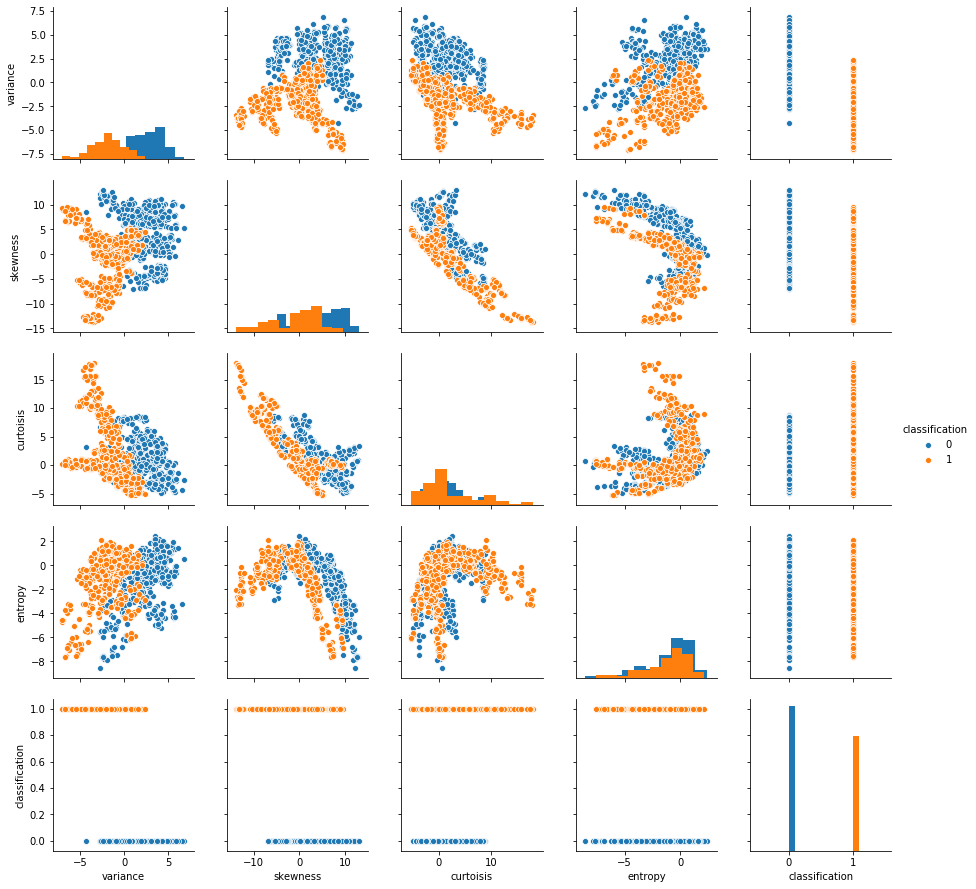

In [32]:
sns.pairplot(train_data, diag_kind ='hist' , hue="classification")
plt.show()

    - Curtoisis and skewness are negatively correlated ;
    - From Variance distribution plot, we can see that it is very discriminative. It might be might be the most influential variable.

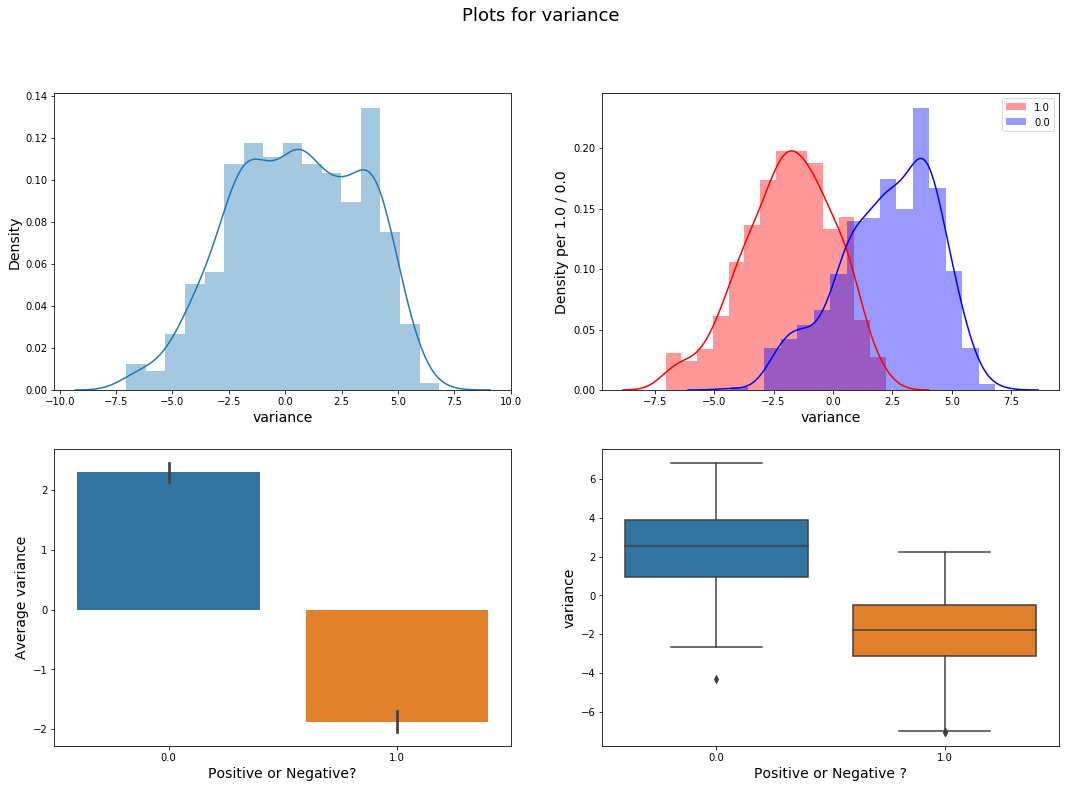

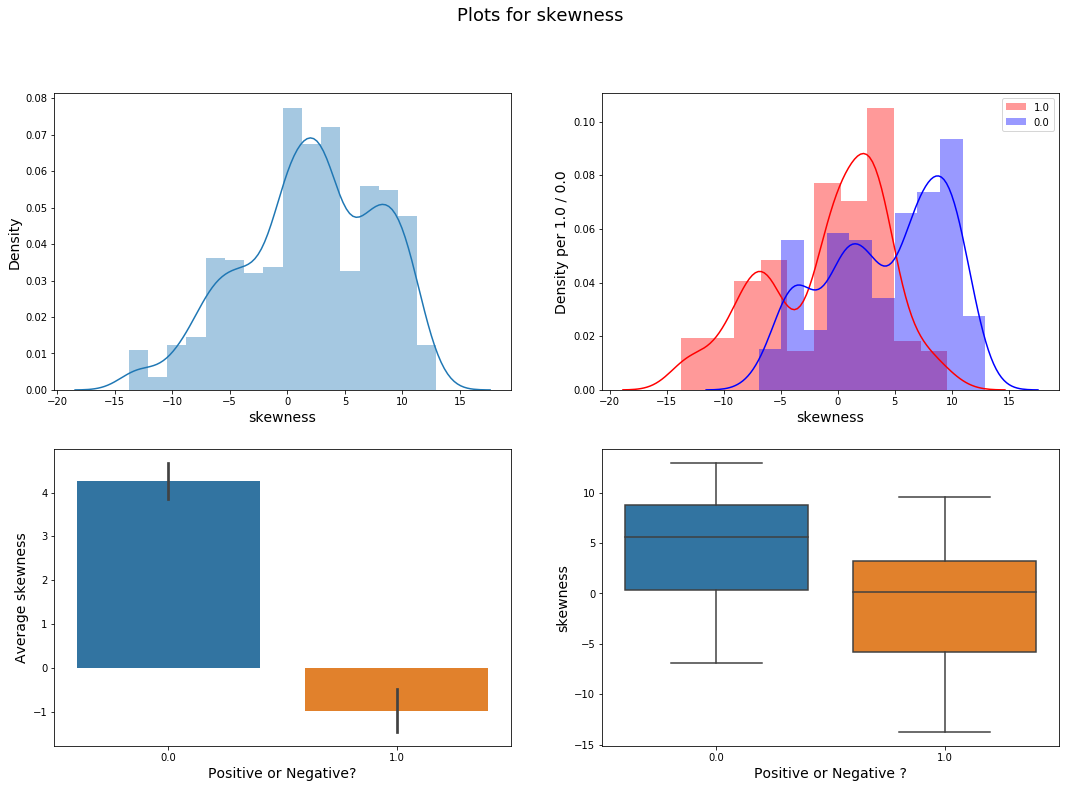

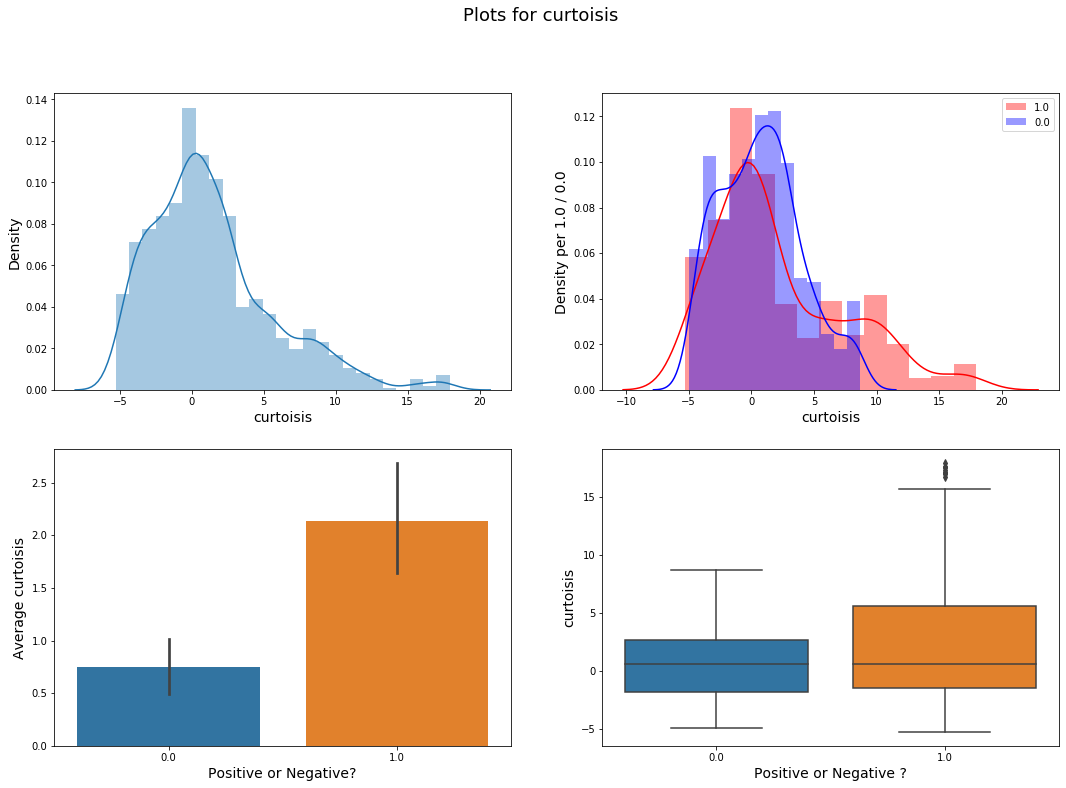

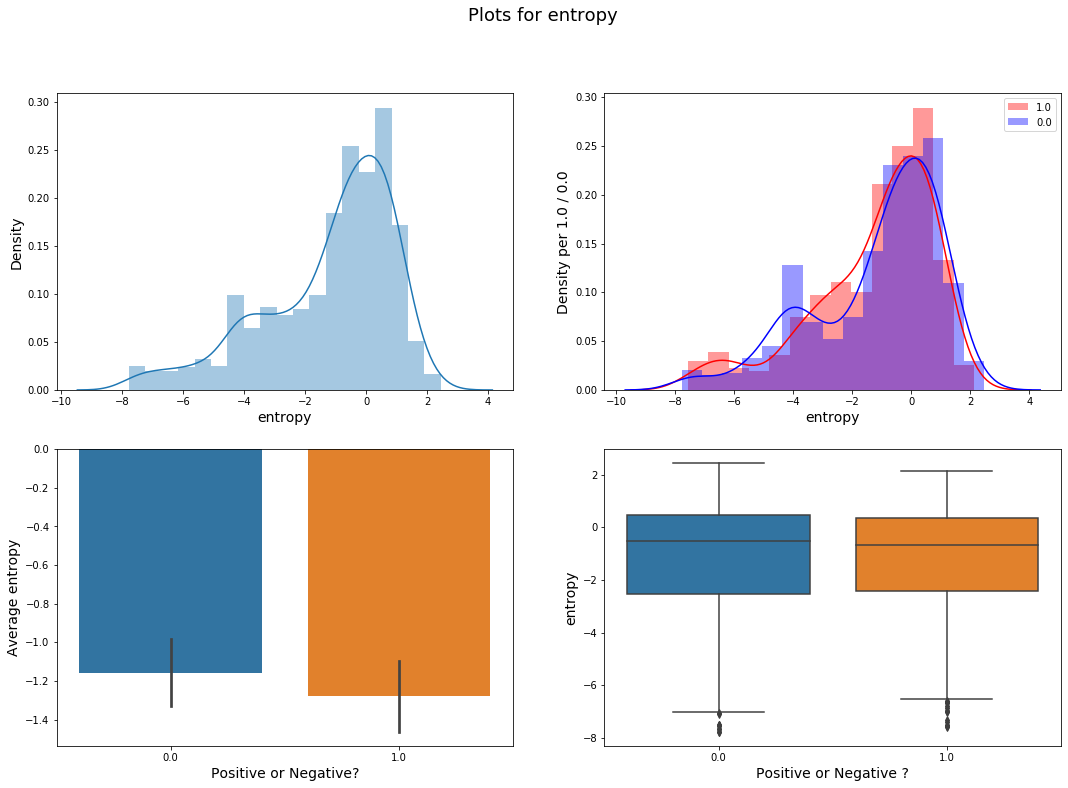

In [160]:
### Plotting Numeric Features
plot_numeric(train_data, numerical_features, 'classification')

- Entropy variable present some outliers.

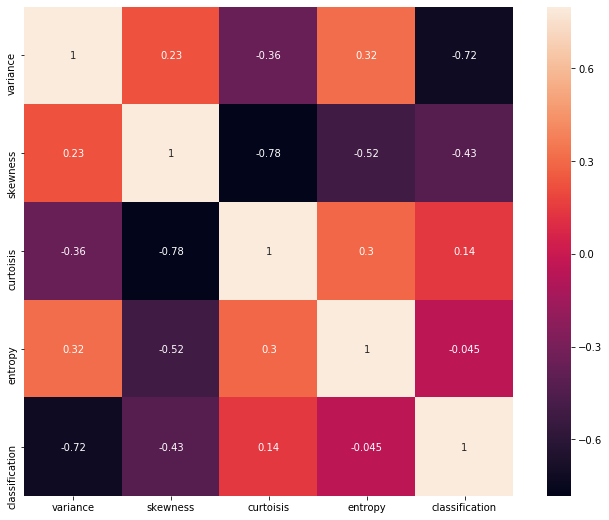

In [39]:
# Correlation Analysis

correlationMap(train_data,'classification')


As mentionned before, variables "skewness" and "curtoisis" are negatively correlated.
Variance is stongly correlated with classification in comparison with other variables. This confirm our previous guess that it might be the most influential variable.

### Scaling

In [42]:
# Encoding categorical features
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

transf_train = featureEng(numerical_features, categorical_features=[]).fit(train_data)
X_train = transf_train.transform(train_data)
y_train = train_data['classification'].values

In [163]:
#  get columns names after transformations
X_train.shape

(1029, 4)

### PCA

In [164]:
# PCA on numerical features
from sklearn.decomposition import PCA
pca = PCA(n_components=X_train.shape[1])
principalComponents = pca.fit_transform(X_train[:,:len(numerical_features)])
principalDf = pd.DataFrame(data = principalComponents[:,:2]
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, pd.DataFrame(y_train)], axis = 1)

In [166]:
pca.explained_variance_

array([2.18706304, 1.28408908, 0.35164469, 0.18109423])

In [165]:
pca.explained_variance_ratio_

array([0.5462344 , 0.3207103 , 0.08782574, 0.04522956])

The two PCs verifies Kaiser rule.

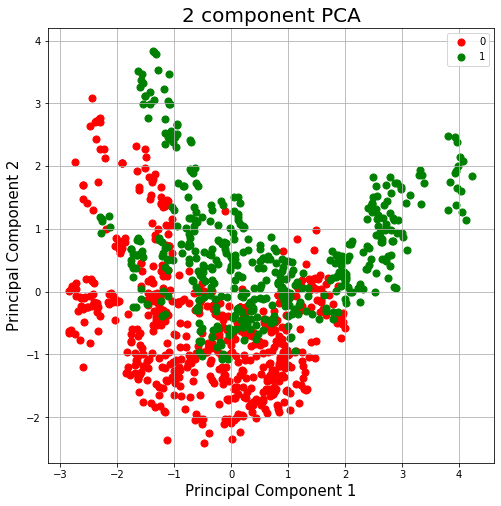

In [47]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf[0] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

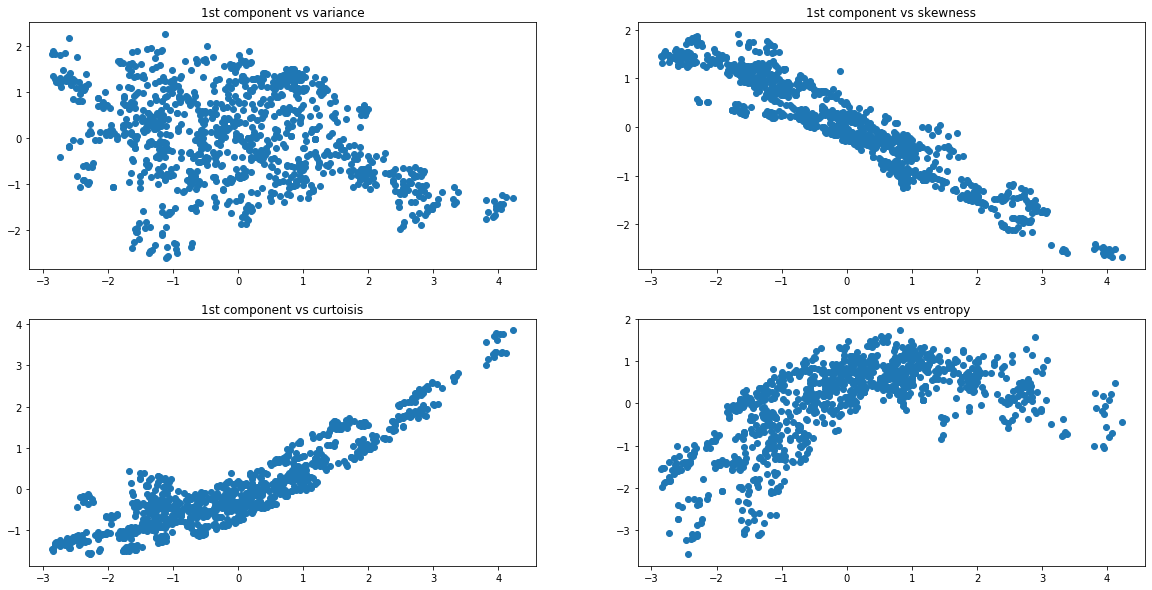

In [50]:
# First Component
n_axes = len(numerical_features)
_, axes = plt.subplots(ncols=2,nrows=2, figsize=(20,10))
col_id = 0

for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        try :
            axes[i][j].scatter(principalComponents[:,0], X_train[:,col_id])
            axes[i][j].set_title(f'1st component vs {numerical_features[col_id]}')
            col_id = col_id+1
        except exception as e:
            print(e)
            break

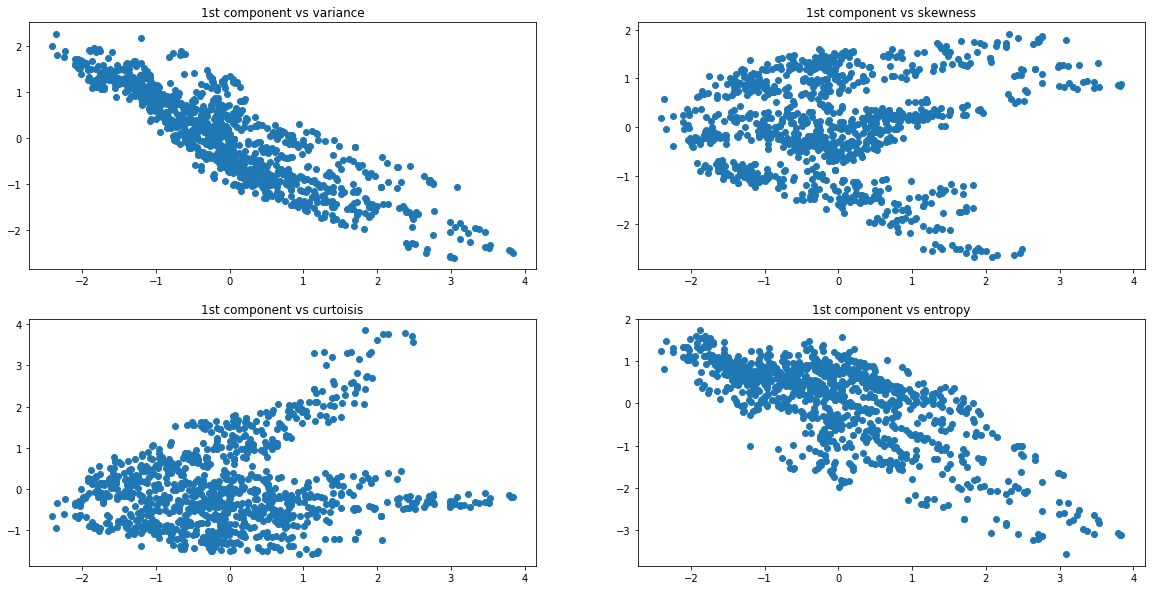

In [51]:
# Second component
n_axes = len(numerical_features)
_, axes = plt.subplots(ncols=2,nrows=2, figsize=(20,10))
col_id = 0

for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        try :
            axes[i][j].scatter(principalComponents[:,1], X_train[:,col_id])
            axes[i][j].set_title(f'1st component vs {numerical_features[col_id]}')
            col_id = col_id+1
        except exception as e:
            print(e)
            break

Skewness and Curtoisis are correlated with PC1 while variance and entropy are correlated with the second.

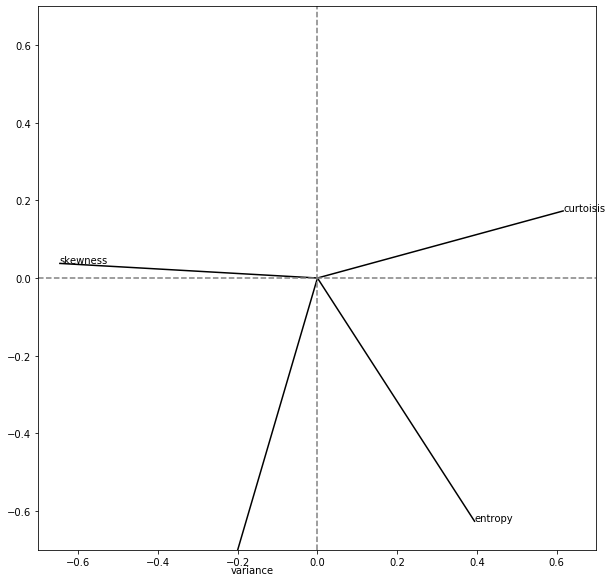

In [52]:
components = pca.components_
plt.figure(figsize=(10,10))
for i, (x, y) in enumerate(zip(components[0,:], components[1,:])):
    plt.plot([0, x], [0, y], color='k')
    plt.text(x, y, numerical_features[i])

plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim(-0.7, 0.7)
plt.ylim(-0.7, 0.7);

PCs represents relatively well initial variables.

In [59]:
from functools import partial
from sklearn.feature_selection import mutual_info_classif, SelectKBest

discreteCol = []

FSelector_mi = selectFeaturesTransformer(k=4,method="Mutual Information", discreteCol=False)
FSelector_rf = selectFeaturesTransformer(k=4,method="Random Forest")
FSelector_mi.fit(X_train,y_train)
FSelector_rf.fit(X_train,y_train)

selectFeaturesTransformer(discreteCol=[], k=4, method='Random Forest')

In [61]:
print("Features ordered by importance selected by Mutual information")
print([numerical_features[i]  for i in FSelector_mi.order[:10]])
print("Features ordered by importance selected by Random Forest")
print([numerical_features[i]  for i in FSelector_rf.order[:10]])

Features ordered by importance selected by Mutual information
['variance', 'skewness', 'curtoisis', 'entropy']
Features ordered by importance selected by Random Forest
['variance', 'skewness', 'curtoisis', 'entropy']


Both method find the same order, with variance at the top. This confirms our previous remarks.

In [168]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, RationalQuadratic, ExpSineSquared
from sklearn.linear_model import SGDClassifier
classifiers = [
    SGDClassifier(loss='log'), # for logistic regression
   KNeighborsClassifier(),
    SVC(),
    GaussianProcessClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    MLPClassifier(),
    GaussianNB()]

ker_rbf = ConstantKernel(1.0, constant_value_bounds="fixed") * RBF(1.0, length_scale_bounds="fixed")

ker_rq = ConstantKernel(1.0, constant_value_bounds="fixed") * RationalQuadratic(alpha=0.1, length_scale=1)

#ker_expsine = ConstantKernel(1.0, constant_value_bounds="fixed") * ExpSineSquared(1.0, 5.0, periodicity_bounds=(1e-2, 1e1))

kernel_list = [ker_rbf, ker_rq]

names = ["Logistic Regression with SGD", "Nearest Neighbors", "SVM", "Gaussian Process",
         "Decision Tree", "Random Forest","Gradient Boosting", "Neural Net",
         "Naive Bayes"]

parameters = {"Logistic Regression with SGD" : {'Classifier__penalty':['l1','l2',None],
                                               'Classifier__learning_rate' : ['constant','optimal','adaptive'],
                                               'Classifier__eta0' : [0.1]},
    "Nearest Neighbors" : {'Classifier__n_neighbors':[5,8,10]},
        'SVM':{'Classifier__kernel':['linear','rbf'],'Classifier__C':[0.1,0.5,1.,1.5]},
        "Gaussian Process":{"Classifier__kernel": kernel_list,
                            "Classifier__n_restarts_optimizer": [1, 2, 3]},
        "Decision Tree" : {"Classifier__max_features" : ['sqrt','log2',None],
                        "Classifier__max_depth":[10,30,50,None]}
        ,"Random Forest":{"Classifier__n_estimators":[8,10,20,50],"Classifier__max_features" : ['sqrt','log2',None],
                        "Classifier__max_depth":[10,30,50,None]},
       'Gradient Boosting':{"Classifier__max_features" : ['sqrt','log2',None],
                        "Classifier__max_depth":[2,3,10],
                        "Classifier__learning_rate":[1e-1,1e-2,1e-3]},
         "Neural Net" : {'Classifier__hidden_layer_sizes': [(20,20,20), (25,50,25), (50,50)],
                      'Classifier__activation': ['tanh', 'relu'],"Classifier__learning_rate_init":[1e-1,1e-2,1e-3]},
        "Naive Bayes" : {"Classifier__var_smoothing" : [1e-8, 1e-9]}
         }
parameters_featuresSelection = {'FeatureSelection__method':['RF'],'FeatureSelection__k':[2,3,4]}

In [169]:
results = train(X_train, y_train, classifiers, names,parameters, parameters_featuresSelection)    

#############  Logistic Regression with SGD  #############
Training time (Cross Validation =  True ) : 0.04935379381533022


,mean_test_score,std_test_score,params,classifier
13,0.990282,0.002749,"{'Classifier__eta0': 0.1, 'Classifier__learning_rate': 'optimal', 'Classifier__penalty': 'l2', 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Logistic Regression with SGD
25,0.989310,0.004933,"{'Classifier__eta0': 0.1, 'Classifier__learning_rate': 'adaptive', 'Classifier__penalty': None, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Logistic Regression with SGD
11,0.989310,0.003626,"{'Classifier__eta0': 0.1, 'Classifier__learning_rate': 'optimal', 'Classifier__penalty': 'l1', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Logistic Regression with SGD
2,0.989310,0.001353,"{'Classifier__eta0': 0.1, 'Classifier__learning_rate': 'constant', 'Classifier__penalty': 'l1', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Logistic Regression with SGD
7,0.988338,0.008556,"{'Classifier__eta0': 0.1, 'Classifier__learning_rate': 'constant', 'Classifier__penalty': None, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Logistic Regression with SGD
1,0.987366,0.007622,"{'Classifier__eta0': 0.1, 'Classifier__learning_rate': 'constant', 'Classifier__penalty': 'l1', 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Logistic Regression with SGD
19,0.987366,0.007622,"{'Classifier__eta0': 0.1, 'Classifier__learning_rate': 'adaptive', 'Classifier__penalty': 'l1', 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Logistic Regression with SGD
22,0.987366,0.007622,"{'Classifier__eta0': 0.1, 'Classifier__learning_rate': 'adaptive', 'Classifier__penalty': 'l2', 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Logistic Regression with SGD
14,0.987366,0.006014,"{'Classifier__eta0': 0.1, 'Classifier__learning_rate': 'optimal', 'Classifier__penalty': 'l2', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Logistic Regression with SGD
17,0.987366,0.003606,"{'Classifier__eta0': 0.1, 'Classifier__learning_rate': 'optimal', 'Classifier__penalty': None, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Logistic Regression with SGD


#############  Nearest Neighbors  #############
Training time (Cross Validation =  True ) : 0.06994798448350695


,mean_test_score,std_test_score,params,classifier
2,0.999028,0.001371,"{'Classifier__n_neighbors': 5, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Nearest Neighbors
5,0.999028,0.001371,"{'Classifier__n_neighbors': 8, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Nearest Neighbors
4,0.998056,0.002743,"{'Classifier__n_neighbors': 8, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Nearest Neighbors
1,0.997085,0.004114,"{'Classifier__n_neighbors': 5, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Nearest Neighbors
8,0.994169,0.004747,"{'Classifier__n_neighbors': 10, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Nearest Neighbors
7,0.992225,0.005973,"{'Classifier__n_neighbors': 10, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Nearest Neighbors
6,0.943635,0.006041,"{'Classifier__n_neighbors': 10, 'FeatureSelection__k': 2, 'FeatureSelection__method': 'RF'}",Nearest Neighbors
3,0.940719,0.005054,"{'Classifier__n_neighbors': 8, 'FeatureSelection__k': 2, 'FeatureSelection__method': 'RF'}",Nearest Neighbors
0,0.939747,0.004990,"{'Classifier__n_neighbors': 5, 'FeatureSelection__k': 2, 'FeatureSelection__method': 'RF'}",Nearest Neighbors


#############  SVM  #############
Training time (Cross Validation =  True ) : 0.054183125495910645


,mean_test_score,std_test_score,params,classifier
23,1.000000,0.000000,"{'Classifier__C': 1.5, 'Classifier__kernel': 'rbf', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",SVM
17,0.999028,0.001371,"{'Classifier__C': 1.0, 'Classifier__kernel': 'rbf', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",SVM
11,0.996113,0.001374,"{'Classifier__C': 0.5, 'Classifier__kernel': 'rbf', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",SVM
22,0.992225,0.003619,"{'Classifier__C': 1.5, 'Classifier__kernel': 'rbf', 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",SVM
16,0.990282,0.004935,"{'Classifier__C': 1.0, 'Classifier__kernel': 'rbf', 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",SVM
19,0.987366,0.003614,"{'Classifier__C': 1.5, 'Classifier__kernel': 'linear', 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",SVM
8,0.987366,0.003606,"{'Classifier__C': 0.5, 'Classifier__kernel': 'linear', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",SVM
10,0.987366,0.003606,"{'Classifier__C': 0.5, 'Classifier__kernel': 'rbf', 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",SVM
13,0.987366,0.003606,"{'Classifier__C': 1.0, 'Classifier__kernel': 'linear', 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",SVM
14,0.987366,0.003606,"{'Classifier__C': 1.0, 'Classifier__kernel': 'linear', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",SVM


#############  Gaussian Process  #############
Training time (Cross Validation =  True ) : 13.028964903619555


,mean_test_score,std_test_score,params,classifier
1,0.994169,0.002367,"{'Classifier__kernel': 1**2 * RBF(length_scale=1), 'Classifier__n_restarts_optimizer': 1, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Gaussian Process
2,0.994169,0.002367,"{'Classifier__kernel': 1**2 * RBF(length_scale=1), 'Classifier__n_restarts_optimizer': 1, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Gaussian Process
4,0.994169,0.002367,"{'Classifier__kernel': 1**2 * RBF(length_scale=1), 'Classifier__n_restarts_optimizer': 2, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Gaussian Process
5,0.994169,0.002367,"{'Classifier__kernel': 1**2 * RBF(length_scale=1), 'Classifier__n_restarts_optimizer': 2, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Gaussian Process
7,0.994169,0.002367,"{'Classifier__kernel': 1**2 * RBF(length_scale=1), 'Classifier__n_restarts_optimizer': 3, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Gaussian Process
8,0.994169,0.002367,"{'Classifier__kernel': 1**2 * RBF(length_scale=1), 'Classifier__n_restarts_optimizer': 3, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Gaussian Process
10,0.994169,0.002367,"{'Classifier__kernel': 1**2 * RationalQuadratic(alpha=0.1, length_scale=1), 'Classifier__n_restarts_optimizer': 1, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Gaussian Process
13,0.994169,0.002367,"{'Classifier__kernel': 1**2 * RationalQuadratic(alpha=0.1, length_scale=1), 'Classifier__n_restarts_optimizer': 2, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Gaussian Process
16,0.994169,0.002367,"{'Classifier__kernel': 1**2 * RationalQuadratic(alpha=0.1, length_scale=1), 'Classifier__n_restarts_optimizer': 3, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Gaussian Process
11,0.992225,0.004935,"{'Classifier__kernel': 1**2 * RationalQuadratic(alpha=0.1, length_scale=1), 'Classifier__n_restarts_optimizer': 1, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Gaussian Process


#############  Decision Tree  #############
Training time (Cross Validation =  True ) : 0.0472572578324212


,mean_test_score,std_test_score,params,classifier
17,0.982507,0.008204,"{'Classifier__max_depth': 30, 'Classifier__max_features': None, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Decision Tree
26,0.982507,0.008204,"{'Classifier__max_depth': 50, 'Classifier__max_features': None, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Decision Tree
8,0.979592,0.014426,"{'Classifier__max_depth': 10, 'Classifier__max_features': None, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Decision Tree
7,0.979592,0.010325,"{'Classifier__max_depth': 10, 'Classifier__max_features': None, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Decision Tree
25,0.979592,0.010325,"{'Classifier__max_depth': 50, 'Classifier__max_features': None, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Decision Tree
11,0.977648,0.010703,"{'Classifier__max_depth': 30, 'Classifier__max_features': 'sqrt', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Decision Tree
5,0.977648,0.006042,"{'Classifier__max_depth': 10, 'Classifier__max_features': 'log2', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Decision Tree
2,0.977648,0.005498,"{'Classifier__max_depth': 10, 'Classifier__max_features': 'sqrt', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Decision Tree
29,0.976676,0.007175,"{'Classifier__max_depth': None, 'Classifier__max_features': 'sqrt', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Decision Tree
35,0.974733,0.019175,"{'Classifier__max_depth': None, 'Classifier__max_features': None, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Decision Tree


#############  Random Forest  #############
Training time (Cross Validation =  True ) : 0.12432061301337348


,mean_test_score,std_test_score,params,classifier
86,0.993197,0.003619,"{'Classifier__max_depth': 50, 'Classifier__max_features': 'log2', 'Classifier__n_estimators': 8, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Random Forest
46,0.992225,0.003619,"{'Classifier__max_depth': 30, 'Classifier__max_features': 'sqrt', 'Classifier__n_estimators': 50, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Random Forest
82,0.992225,0.002731,"{'Classifier__max_depth': 50, 'Classifier__max_features': 'sqrt', 'Classifier__n_estimators': 50, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Random Forest
92,0.992225,0.001375,"{'Classifier__max_depth': 50, 'Classifier__max_features': 'log2', 'Classifier__n_estimators': 20, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Random Forest
88,0.991254,0.007121,"{'Classifier__max_depth': 50, 'Classifier__max_features': 'log2', 'Classifier__n_estimators': 10, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Random Forest
...,...,...,...,...
60,0.934888,0.003688,"{'Classifier__max_depth': 30, 'Classifier__max_features': None, 'Classifier__n_estimators': 8, 'FeatureSelection__k': 2, 'FeatureSelection__method': 'RF'}",Random Forest
120,0.931973,0.020223,"{'Classifier__max_depth': None, 'Classifier__max_features': 'log2', 'Classifier__n_estimators': 8, 'FeatureSelection__k': 2, 'FeatureSelection__method': 'RF'}",Random Forest
72,0.931001,0.009033,"{'Classifier__max_depth': 50, 'Classifier__max_features': 'sqrt', 'Classifier__n_estimators': 8, 'FeatureSelection__k': 2, 'FeatureSelection__method': 'RF'}",Random Forest
123,0.929057,0.011728,"{'Classifier__max_depth': None, 'Classifier__max_features': 'log2', 'Classifier__n_estimators': 10, 'FeatureSelection__k': 2, 'FeatureSelection__method': 'RF'}",Random Forest


#############  Gradient Boosting  #############
Training time (Cross Validation =  True ) : 0.269757647573212


,mean_test_score,std_test_score,params,classifier
11,0.991254,0.006275,"{'Classifier__learning_rate': 0.1, 'Classifier__max_depth': 3, 'Classifier__max_features': 'sqrt', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Gradient Boosting
10,0.990282,0.005967,"{'Classifier__learning_rate': 0.1, 'Classifier__max_depth': 3, 'Classifier__max_features': 'sqrt', 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Gradient Boosting
13,0.990282,0.005967,"{'Classifier__learning_rate': 0.1, 'Classifier__max_depth': 3, 'Classifier__max_features': 'log2', 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Gradient Boosting
14,0.990282,0.005967,"{'Classifier__learning_rate': 0.1, 'Classifier__max_depth': 3, 'Classifier__max_features': 'log2', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Gradient Boosting
16,0.990282,0.005967,"{'Classifier__learning_rate': 0.1, 'Classifier__max_depth': 3, 'Classifier__max_features': None, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Gradient Boosting
...,...,...,...,...
76,0.569485,0.000707,"{'Classifier__learning_rate': 0.001, 'Classifier__max_depth': 10, 'Classifier__max_features': 'log2', 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Gradient Boosting
77,0.569485,0.000707,"{'Classifier__learning_rate': 0.001, 'Classifier__max_depth': 10, 'Classifier__max_features': 'log2', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Gradient Boosting
78,0.569485,0.000707,"{'Classifier__learning_rate': 0.001, 'Classifier__max_depth': 10, 'Classifier__max_features': None, 'FeatureSelection__k': 2, 'FeatureSelection__method': 'RF'}",Gradient Boosting
79,0.569485,0.000707,"{'Classifier__learning_rate': 0.001, 'Classifier__max_depth': 10, 'Classifier__max_features': None, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Gradient Boosting


#############  Neural Net  #############
Training time (Cross Validation =  True ) : 1.0440200876306605


,mean_test_score,std_test_score,params,classifier
2,1.000000,0.000000,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (20, 20, 20), 'Classifier__learning_rate_init': 0.1, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Neural Net
4,1.000000,0.000000,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (20, 20, 20), 'Classifier__learning_rate_init': 0.01, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Neural Net
5,1.000000,0.000000,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (20, 20, 20), 'Classifier__learning_rate_init': 0.01, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Neural Net
7,1.000000,0.000000,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (20, 20, 20), 'Classifier__learning_rate_init': 0.001, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Neural Net
8,1.000000,0.000000,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (20, 20, 20), 'Classifier__learning_rate_init': 0.001, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Neural Net
11,1.000000,0.000000,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (25, 50, 25), 'Classifier__learning_rate_init': 0.1, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Neural Net
13,1.000000,0.000000,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (25, 50, 25), 'Classifier__learning_rate_init': 0.01, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Neural Net
14,1.000000,0.000000,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (25, 50, 25), 'Classifier__learning_rate_init': 0.01, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Neural Net
16,1.000000,0.000000,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (25, 50, 25), 'Classifier__learning_rate_init': 0.001, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Neural Net
17,1.000000,0.000000,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (25, 50, 25), 'Classifier__learning_rate_init': 0.001, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Neural Net


#############  Naive Bayes  #############
Training time (Cross Validation =  True ) : 0.06162730852762858


,mean_test_score,std_test_score,params,classifier
0,0.871720,0.016411,"{'Classifier__var_smoothing': 1e-08, 'FeatureSelection__k': 2, 'FeatureSelection__method': 'RF'}",Naive Bayes
3,0.871720,0.016411,"{'Classifier__var_smoothing': 1e-09, 'FeatureSelection__k': 2, 'FeatureSelection__method': 'RF'}",Naive Bayes
1,0.846453,0.015009,"{'Classifier__var_smoothing': 1e-08, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Naive Bayes
4,0.846453,0.015009,"{'Classifier__var_smoothing': 1e-09, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Naive Bayes
2,0.845481,0.016899,"{'Classifier__var_smoothing': 1e-08, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Naive Bayes
5,0.845481,0.016899,"{'Classifier__var_smoothing': 1e-09, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Naive Bayes


In [63]:
from sklearn.pipeline import Pipeline
# iterate over classifiers
from sklearn.model_selection import GridSearchCV
from IPython.display import display

results = pd.DataFrame()
for name, clf in zip(names, classifiers):
    print('############# ', name, ' #############')
    #print(params[name])
    FSelector = selectFeaturesTransformer()
    pipeline = Pipeline([('FeatureSelection',FSelector),('Classifier',clf)])
    parameters[name]['FeatureSelection__method'] = ['RF']
    parameters[name]['FeatureSelection__k']=[2,3,4]
   # print(parameters[name])
    classifier = GridSearchCV(pipeline, parameters[name], cv=3)
    #print(classifier)
    classifier.fit(X_train, y_train)
    # All results
    means = classifier.cv_results_['mean_test_score']
    stds = classifier.cv_results_['std_test_score']
    r = pd.DataFrame(means,columns = ['mean_test_score'])
    r['std_test_score'] = stds
    r['params'] = classifier.cv_results_['params']
    r['classifier'] = name
    display(r.sort_values(by=['mean_test_score','std_test_score'],ascending =False))
    results = pd.concat([results, r], ignore_index=True)
    #for mean, std, params in zip(means, stds, classifier.cv_results_['params']):
        #print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
        

# To do : Store overall 3 best performances 
    

#############  Logistic Regression with SGD  #############


,mean_test_score,std_test_score,params,classifier
10,0.990282,0.002749,"{'Classifier__eta0': 0.1, 'Classifier__learning_rate': 'optimal', 'Classifier__penalty': 'l1', 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Logistic Regression with SGD
14,0.987366,0.004982,"{'Classifier__eta0': 0.1, 'Classifier__learning_rate': 'optimal', 'Classifier__penalty': 'l2', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Logistic Regression with SGD
7,0.987366,0.002773,"{'Classifier__eta0': 0.1, 'Classifier__learning_rate': 'constant', 'Classifier__penalty': None, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Logistic Regression with SGD
4,0.987366,0.001375,"{'Classifier__eta0': 0.1, 'Classifier__learning_rate': 'constant', 'Classifier__penalty': 'l2', 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Logistic Regression with SGD
11,0.987366,0.001375,"{'Classifier__eta0': 0.1, 'Classifier__learning_rate': 'optimal', 'Classifier__penalty': 'l1', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Logistic Regression with SGD
25,0.987366,0.001375,"{'Classifier__eta0': 0.1, 'Classifier__learning_rate': 'adaptive', 'Classifier__penalty': None, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Logistic Regression with SGD
13,0.986395,0.009015,"{'Classifier__eta0': 0.1, 'Classifier__learning_rate': 'optimal', 'Classifier__penalty': 'l2', 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Logistic Regression with SGD
8,0.986395,0.002749,"{'Classifier__eta0': 0.1, 'Classifier__learning_rate': 'constant', 'Classifier__penalty': None, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Logistic Regression with SGD
19,0.986395,0.002749,"{'Classifier__eta0': 0.1, 'Classifier__learning_rate': 'adaptive', 'Classifier__penalty': 'l1', 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Logistic Regression with SGD
20,0.986395,0.002749,"{'Classifier__eta0': 0.1, 'Classifier__learning_rate': 'adaptive', 'Classifier__penalty': 'l1', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Logistic Regression with SGD


#############  Nearest Neighbors  #############


,mean_test_score,std_test_score,params,classifier
2,0.999028,0.001377,"{'Classifier__n_neighbors': 5, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Nearest Neighbors
8,0.999028,0.001377,"{'Classifier__n_neighbors': 10, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Nearest Neighbors
5,0.998056,0.001377,"{'Classifier__n_neighbors': 8, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Nearest Neighbors
1,0.995141,0.001383,"{'Classifier__n_neighbors': 5, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Nearest Neighbors
4,0.995141,0.001374,"{'Classifier__n_neighbors': 8, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Nearest Neighbors
7,0.993197,0.001359,"{'Classifier__n_neighbors': 10, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Nearest Neighbors
0,0.929057,0.003525,"{'Classifier__n_neighbors': 5, 'FeatureSelection__k': 2, 'FeatureSelection__method': 'RF'}",Nearest Neighbors
3,0.929057,0.002754,"{'Classifier__n_neighbors': 8, 'FeatureSelection__k': 2, 'FeatureSelection__method': 'RF'}",Nearest Neighbors
6,0.924198,0.002297,"{'Classifier__n_neighbors': 10, 'FeatureSelection__k': 2, 'FeatureSelection__method': 'RF'}",Nearest Neighbors


#############  SVM  #############


,mean_test_score,std_test_score,params,classifier
17,1.000000,0.000000,"{'Classifier__C': 1.0, 'Classifier__kernel': 'rbf', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",SVM
23,1.000000,0.000000,"{'Classifier__C': 1.5, 'Classifier__kernel': 'rbf', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",SVM
11,0.998056,0.001377,"{'Classifier__C': 0.5, 'Classifier__kernel': 'rbf', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",SVM
22,0.997085,0.002387,"{'Classifier__C': 1.5, 'Classifier__kernel': 'rbf', 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",SVM
16,0.995141,0.001374,"{'Classifier__C': 1.0, 'Classifier__kernel': 'rbf', 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",SVM
10,0.988338,0.002408,"{'Classifier__C': 0.5, 'Classifier__kernel': 'rbf', 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",SVM
5,0.987366,0.001347,"{'Classifier__C': 0.1, 'Classifier__kernel': 'rbf', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",SVM
19,0.985423,0.002396,"{'Classifier__C': 1.5, 'Classifier__kernel': 'linear', 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",SVM
20,0.984451,0.005497,"{'Classifier__C': 1.5, 'Classifier__kernel': 'linear', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",SVM
13,0.984451,0.003647,"{'Classifier__C': 1.0, 'Classifier__kernel': 'linear', 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",SVM


#############  Gaussian Process  #############


,mean_test_score,std_test_score,params,classifier
2,0.995141,0.001374,"{'Classifier__kernel': 1**2 * RBF(length_scale=1), 'Classifier__n_restarts_optimizer': 1, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Gaussian Process
5,0.995141,0.001374,"{'Classifier__kernel': 1**2 * RBF(length_scale=1), 'Classifier__n_restarts_optimizer': 2, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Gaussian Process
8,0.995141,0.001374,"{'Classifier__kernel': 1**2 * RBF(length_scale=1), 'Classifier__n_restarts_optimizer': 3, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Gaussian Process
1,0.992225,0.003628,"{'Classifier__kernel': 1**2 * RBF(length_scale=1), 'Classifier__n_restarts_optimizer': 1, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Gaussian Process
4,0.992225,0.003628,"{'Classifier__kernel': 1**2 * RBF(length_scale=1), 'Classifier__n_restarts_optimizer': 2, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Gaussian Process
7,0.992225,0.003628,"{'Classifier__kernel': 1**2 * RBF(length_scale=1), 'Classifier__n_restarts_optimizer': 3, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Gaussian Process
10,0.992225,0.003628,"{'Classifier__kernel': 1**2 * RationalQuadratic(alpha=0.1, length_scale=1), 'Classifier__n_restarts_optimizer': 1, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Gaussian Process
11,0.992225,0.003628,"{'Classifier__kernel': 1**2 * RationalQuadratic(alpha=0.1, length_scale=1), 'Classifier__n_restarts_optimizer': 1, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Gaussian Process
13,0.992225,0.003628,"{'Classifier__kernel': 1**2 * RationalQuadratic(alpha=0.1, length_scale=1), 'Classifier__n_restarts_optimizer': 2, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Gaussian Process
14,0.992225,0.003628,"{'Classifier__kernel': 1**2 * RationalQuadratic(alpha=0.1, length_scale=1), 'Classifier__n_restarts_optimizer': 2, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Gaussian Process


#############  Decision Tree  #############


,mean_test_score,std_test_score,params,classifier
23,0.978620,0.004909,"{'Classifier__max_depth': 50, 'Classifier__max_features': 'log2', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Decision Tree
5,0.977648,0.008332,"{'Classifier__max_depth': 10, 'Classifier__max_features': 'log2', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Decision Tree
11,0.977648,0.005455,"{'Classifier__max_depth': 30, 'Classifier__max_features': 'sqrt', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Decision Tree
29,0.977648,0.005009,"{'Classifier__max_depth': None, 'Classifier__max_features': 'sqrt', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Decision Tree
19,0.973761,0.007105,"{'Classifier__max_depth': 50, 'Classifier__max_features': 'sqrt', 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Decision Tree
32,0.971817,0.007323,"{'Classifier__max_depth': None, 'Classifier__max_features': 'log2', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Decision Tree
4,0.971817,0.001318,"{'Classifier__max_depth': 10, 'Classifier__max_features': 'log2', 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Decision Tree
22,0.969874,0.020041,"{'Classifier__max_depth': 50, 'Classifier__max_features': 'log2', 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Decision Tree
2,0.969874,0.014310,"{'Classifier__max_depth': 10, 'Classifier__max_features': 'sqrt', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Decision Tree
17,0.969874,0.003708,"{'Classifier__max_depth': 30, 'Classifier__max_features': None, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Decision Tree


#############  Random Forest  #############


,mean_test_score,std_test_score,params,classifier
47,0.991254,0.006292,"{'Classifier__max_depth': 30, 'Classifier__max_features': 'sqrt', 'Classifier__n_estimators': 50, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Random Forest
59,0.991254,0.006292,"{'Classifier__max_depth': 30, 'Classifier__max_features': 'log2', 'Classifier__n_estimators': 50, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Random Forest
95,0.991254,0.006292,"{'Classifier__max_depth': 50, 'Classifier__max_features': 'log2', 'Classifier__n_estimators': 50, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Random Forest
119,0.991254,0.006292,"{'Classifier__max_depth': None, 'Classifier__max_features': 'sqrt', 'Classifier__n_estimators': 50, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Random Forest
125,0.991254,0.006292,"{'Classifier__max_depth': None, 'Classifier__max_features': 'log2', 'Classifier__n_estimators': 10, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Random Forest
...,...,...,...,...
99,0.923226,0.005808,"{'Classifier__max_depth': 50, 'Classifier__max_features': None, 'Classifier__n_estimators': 10, 'FeatureSelection__k': 2, 'FeatureSelection__method': 'RF'}",Random Forest
72,0.922255,0.014436,"{'Classifier__max_depth': 50, 'Classifier__max_features': 'sqrt', 'Classifier__n_estimators': 8, 'FeatureSelection__k': 2, 'FeatureSelection__method': 'RF'}",Random Forest
111,0.922255,0.012927,"{'Classifier__max_depth': None, 'Classifier__max_features': 'sqrt', 'Classifier__n_estimators': 10, 'FeatureSelection__k': 2, 'FeatureSelection__method': 'RF'}",Random Forest
87,0.922255,0.009737,"{'Classifier__max_depth': 50, 'Classifier__max_features': 'log2', 'Classifier__n_estimators': 10, 'FeatureSelection__k': 2, 'FeatureSelection__method': 'RF'}",Random Forest


#############  Gradient Boosting  #############


,mean_test_score,std_test_score,params,classifier
20,0.992225,0.003628,"{'Classifier__learning_rate': 0.1, 'Classifier__max_depth': 10, 'Classifier__max_features': 'sqrt', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Gradient Boosting
23,0.992225,0.003628,"{'Classifier__learning_rate': 0.1, 'Classifier__max_depth': 10, 'Classifier__max_features': 'log2', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Gradient Boosting
50,0.992225,0.003628,"{'Classifier__learning_rate': 0.01, 'Classifier__max_depth': 10, 'Classifier__max_features': 'log2', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Gradient Boosting
17,0.991254,0.007126,"{'Classifier__learning_rate': 0.1, 'Classifier__max_depth': 3, 'Classifier__max_features': None, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Gradient Boosting
11,0.991254,0.004747,"{'Classifier__learning_rate': 0.1, 'Classifier__max_depth': 3, 'Classifier__max_features': 'sqrt', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Gradient Boosting
...,...,...,...,...
76,0.557823,0.000701,"{'Classifier__learning_rate': 0.001, 'Classifier__max_depth': 10, 'Classifier__max_features': 'log2', 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Gradient Boosting
77,0.557823,0.000701,"{'Classifier__learning_rate': 0.001, 'Classifier__max_depth': 10, 'Classifier__max_features': 'log2', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Gradient Boosting
78,0.557823,0.000701,"{'Classifier__learning_rate': 0.001, 'Classifier__max_depth': 10, 'Classifier__max_features': None, 'FeatureSelection__k': 2, 'FeatureSelection__method': 'RF'}",Gradient Boosting
79,0.557823,0.000701,"{'Classifier__learning_rate': 0.001, 'Classifier__max_depth': 10, 'Classifier__max_features': None, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Gradient Boosting


#############  Neural Net  #############


,mean_test_score,std_test_score,params,classifier
1,1.000000,0.000000,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (20, 20, 20), 'Classifier__learning_rate_init': 0.1, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Neural Net
2,1.000000,0.000000,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (20, 20, 20), 'Classifier__learning_rate_init': 0.1, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Neural Net
4,1.000000,0.000000,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (20, 20, 20), 'Classifier__learning_rate_init': 0.01, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Neural Net
5,1.000000,0.000000,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (20, 20, 20), 'Classifier__learning_rate_init': 0.01, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Neural Net
7,1.000000,0.000000,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (20, 20, 20), 'Classifier__learning_rate_init': 0.001, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Neural Net
8,1.000000,0.000000,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (20, 20, 20), 'Classifier__learning_rate_init': 0.001, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Neural Net
11,1.000000,0.000000,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (25, 50, 25), 'Classifier__learning_rate_init': 0.1, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Neural Net
13,1.000000,0.000000,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (25, 50, 25), 'Classifier__learning_rate_init': 0.01, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Neural Net
14,1.000000,0.000000,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (25, 50, 25), 'Classifier__learning_rate_init': 0.01, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Neural Net
16,1.000000,0.000000,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (25, 50, 25), 'Classifier__learning_rate_init': 0.001, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Neural Net


#############  Naive Bayes  #############


,mean_test_score,std_test_score,params,classifier
0,0.868805,0.014938,"{'Classifier__var_smoothing': 1e-08, 'FeatureSelection__k': 2, 'FeatureSelection__method': 'RF'}",Naive Bayes
3,0.868805,0.014938,"{'Classifier__var_smoothing': 1e-09, 'FeatureSelection__k': 2, 'FeatureSelection__method': 'RF'}",Naive Bayes
1,0.834791,0.025726,"{'Classifier__var_smoothing': 1e-08, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Naive Bayes
4,0.834791,0.025726,"{'Classifier__var_smoothing': 1e-09, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Naive Bayes
2,0.834791,0.025439,"{'Classifier__var_smoothing': 1e-08, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Naive Bayes
5,0.834791,0.025439,"{'Classifier__var_smoothing': 1e-09, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Naive Bayes


In [64]:
results_sorted = results.sort_values(by=['mean_test_score','std_test_score'],ascending =False)
results_sorted.iloc[:10]

,mean_test_score,std_test_score,params,classifier
53,1.0,0.0,"{'Classifier__C': 1.0, 'Classifier__kernel': 'rbf', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",SVM
59,1.0,0.0,"{'Classifier__C': 1.5, 'Classifier__kernel': 'rbf', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",SVM
340,1.0,0.0,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (20, 20, 20), 'Classifier__learning_rate_init': 0.1, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Neural Net
341,1.0,0.0,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (20, 20, 20), 'Classifier__learning_rate_init': 0.1, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Neural Net
343,1.0,0.0,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (20, 20, 20), 'Classifier__learning_rate_init': 0.01, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Neural Net
344,1.0,0.0,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (20, 20, 20), 'Classifier__learning_rate_init': 0.01, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Neural Net
346,1.0,0.0,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (20, 20, 20), 'Classifier__learning_rate_init': 0.001, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Neural Net
347,1.0,0.0,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (20, 20, 20), 'Classifier__learning_rate_init': 0.001, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Neural Net
350,1.0,0.0,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (25, 50, 25), 'Classifier__learning_rate_init': 0.1, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Neural Net
352,1.0,0.0,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (25, 50, 25), 'Classifier__learning_rate_init': 0.01, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Neural Net


In [174]:
results.groupby('classifier').head(3)

,mean_test_score,std_test_score,params,classifier
59,1.000000,0.000000,"{'Classifier__C': 1.5, 'Classifier__kernel': 'rbf', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",SVM
341,1.000000,0.000000,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (20, 20, 20), 'Classifier__learning_rate_init': 0.1, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Neural Net
343,1.000000,0.000000,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (20, 20, 20), 'Classifier__learning_rate_init': 0.01, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Neural Net
344,1.000000,0.000000,"{'Classifier__activation': 'tanh', 'Classifier__hidden_layer_sizes': (20, 20, 20), 'Classifier__learning_rate_init': 0.01, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Neural Net
29,0.999028,0.001371,"{'Classifier__n_neighbors': 5, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Nearest Neighbors
32,0.999028,0.001371,"{'Classifier__n_neighbors': 8, 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",Nearest Neighbors
53,0.999028,0.001371,"{'Classifier__C': 1.0, 'Classifier__kernel': 'rbf', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",SVM
31,0.998056,0.002743,"{'Classifier__n_neighbors': 8, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Nearest Neighbors
47,0.996113,0.001374,"{'Classifier__C': 0.5, 'Classifier__kernel': 'rbf', 'FeatureSelection__k': 4, 'FeatureSelection__method': 'RF'}",SVM
61,0.994169,0.002367,"{'Classifier__kernel': 1**2 * RBF(length_scale=1), 'Classifier__n_restarts_optimizer': 1, 'FeatureSelection__k': 3, 'FeatureSelection__method': 'RF'}",Gaussian Process


SVM and Neural Network give the best performances. We apply SVM model the test data (Occham's razor)

In [175]:
# apply transformations on test data
test_data = transf_alphaN.transform(test_data)
test_data = transf_num.transform(test_data)
test_data = transf_Missing.transform(test_data)

In [177]:
y_test = test_data['classification'].values
X_test = transf_train.transform(test_data)

In [67]:
X_test

array([[ 1.55350266, -0.17580658,  0.03555692,  1.11659275],
       [ 1.56002083,  1.07819382, -1.03907111, -0.16079059],
       [ 1.27423765,  0.14550836, -0.15889635,  0.89054022],
       ...,
       [-0.7371783 , -1.82176136,  1.51960831,  0.32792295],
       [ 1.49038856,  1.49357857, -1.42177106, -1.47356742],
       [ 1.28769451, -0.81735726,  0.16720664,  0.78683297]])

In [178]:
model_selected = results.iloc[0]
model = classifiers[names.index(model_selected['classifier'])]
param = {key.split('__')[1]:val for key,val in model_selected['params'].items() if 'FeatureSelection' not in key } 
model.set_params(**param)

SVC(C=1.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [179]:
model.fit(X_train,y_train)
model.score(X_test, y_test)

1.0

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test), target_names=['0','1']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       188
           1       1.00      1.00      1.00       155

    accuracy                           1.00       343
   macro avg       1.00      1.00      1.00       343
weighted avg       1.00      1.00      1.00       343

